In [ ]:
Problem_Statement & Understanding
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know

In [ ]:
Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

In [ ]:


You are required to model the price of houses with the available independent variables
and to build a model using Machine Learning in order to predict the actual value



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Load the Train dataset
train = pd.read_csv(r'E:\download\ProojectHousing-2\train.csv')

In [4]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [5]:
train.shape  # lets check the dataset shape

(1168, 81)

In [4]:
#  Load the test dataset
test = pd.read_csv(r'E:\download\ProojectHousing-2\test.csv')

In [7]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [8]:
test.shape

(292, 80)

In [5]:
#  let Concat the Train & Test data

df= pd.concat([train, test], axis=0, ignore_index=True)

In [10]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [6]:
df.drop('Id', axis=1, inplace=True)  # unnecessary column

In [12]:


df.shape  # lets check the shape of  df Dataset

(1460, 80)

In [13]:
df.isnull().sum()   # checking nll value of the dataset


MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [7]:
# dropped those Attributes in which above 98 percent of data is null value
df= df.drop(['PoolQC','Fence','MiscFeature','Alley'], axis=1)
df.drop('FireplaceQu',  axis=1, inplace=True)   # 40 percent elements of this columns are null so I dropped it 

In [22]:
df.info()   # summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [23]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL    74.680043     4928   Pave      IR1         Lvl   
1          20       RL    95.000000    15865   Pave      IR1         Lvl   
2          60       RL    92.000000     9920   Pave      IR1         Lvl   
3          20       RL   105.000000    11751   Pave      IR1         Lvl   
4          20       RL    74.680043    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           1     Attchd       1977.0   
1          Gd             8        Typ           1     Attchd       1970.0   
2          TA             8        Typ           1     Attchd       1997.0   
3          TA          

In [8]:
# lets impute the null value by mean & mode method according to same Attributes that contain null value

df['LotFrontage'].fillna(df.groupby('MSZoning')['LotFrontage'].transform('mean'), inplace=True)  
                                                       
df['GarageFinish'].fillna(df.groupby('MSZoning')['GarageFinish'].transform(lambda x: x.mode()[0]), inplace=True) 
    
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)      
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)      
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0], inplace=True)     
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)    
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)  
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)          
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)           
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)


In [27]:

df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [12]:
df[['PoolArea','MiscVal','ScreenPorch','3SsnPorch','LowQualFinSF','BsmtFinSF2']].describe()

# in these Attributes have maximum elements are similar or more than 96 percent of elements similar


PoolArea       MiscVal  ScreenPorch    3SsnPorch  LowQualFinSF  \
count  1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean      2.758904     43.489041    15.060959     3.409589      5.844521   
std      40.177307    496.123024    55.757415    29.317331     48.623081   
min       0.000000      0.000000     0.000000     0.000000      0.000000   
25%       0.000000      0.000000     0.000000     0.000000      0.000000   
50%       0.000000      0.000000     0.000000     0.000000      0.000000   
75%       0.000000      0.000000     0.000000     0.000000      0.000000   
max     738.000000  15500.000000   480.000000   508.000000    572.000000   

        BsmtFinSF2  
count  1460.000000  
mean     46.549315  
std     161.319273  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max    1474.000000

In [43]:
#  Statistical description
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.465342   10516.828082     6.099315     5.575342   
std      42.300571    22.207829    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    72.500000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   ExterQual    ExterCond  \
count  1460.000000   1460.000000  1452.000000  1460.00000  1460.000000   
mean   1971.267808   1984.865753   103.685262     2.39589     2.083562   
std      30.202904     20.645407   181.066207     0.57428     0.351054   
min    1872.000000   1950.000000     0.000000     1.00000     0.000000   
25%    1954.000000   1967.000000     0.000000     2.00000     2.000000   
50%    1973.000000   1994.000000     0.000000     2.00000     2.000000   
75%    2000.000000   2004.000000   166.000000     3.00000     2.000000   
max    2010.000000   2010.000000  1600.000000     4.00000     4.000000   

          BsmtQual     BsmtCond   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      2.565068     2.010959   443.639726    46.549315   567.240411   
std       0.678071     0.284178   456.098091   161.319273   441.866955   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     2.000000     0.000000     0.000000   223.000000   
50%       3.000000     2.000000   383.500000     0.000000   477.500000   
75%       3.000000     2.000000   712.250000     0.000000   808.000000   
max       4.000000     3.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std     438.705324   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.750000   882.000000     0.000000      0.000000  1129.500000   
50%     991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%    1298.250000  1391.250000   728.000000      0.000000  1776.750000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  KitchenQual  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean       1.046575     2.511644      6.517808     0.613014  1979.976027   
std        0.220338     0.663760      1.625393     0.644666    24.749688   
min        0.000000     1.000000      2.000000     0.000000  1900.000000   
25%        1.000000     2.000000      5.000000     0.000000  1962.000000   
50%        1.000000     2.000000      6.000000     1.000000  1984.500000   
75%        1.000000     3.000000      7.000000     1.000000  2003.000000   
max        

In [28]:
 # lets check how many types of values in categorical Attributes
    
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())
    print()  


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Norm      1260
Feedr       81
Art

<AxesSubplot:ylabel='Utilities'>

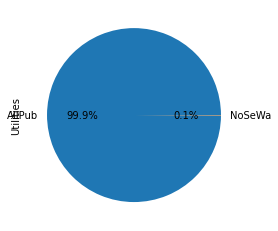

In [33]:

#  lets check how many  percentage  are same type of value
df['Utilities'].value_counts().plot.pie(autopct= '%1.1f%%')       # 99 percent of value are same type 

<AxesSubplot:ylabel='Street'>

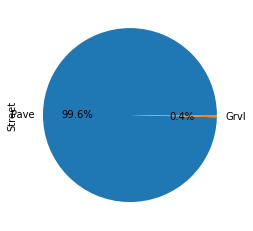

In [32]:
   # lets check how many  percentage  are same type of value
df['Street'].value_counts().plot.pie(autopct= '%1.1f%%')       # 99  percent of value are same type 

<AxesSubplot:ylabel='MiscVal'>

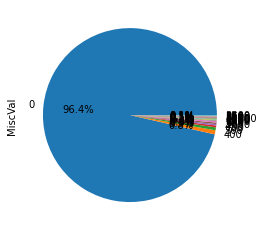

In [50]:
#
  # checking how many percentage of same value is in this attributes
df['MiscVal'].value_counts().plot.pie(autopct= '%1.1f%%')       # 96 percent of value are same type 

<AxesSubplot:ylabel='PoolArea'>

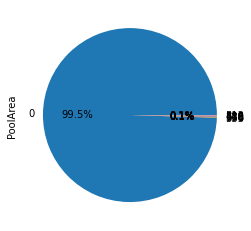

In [52]:
#
   # checking how many percentage of same value is in this attributes
df['PoolArea'].value_counts().plot.pie(autopct= '%1.1f%%')       # 99 percent of value are same type 

<AxesSubplot:ylabel='Condition2'>

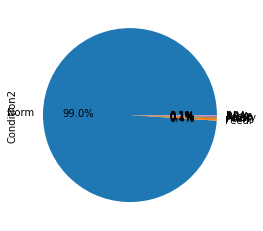

In [34]:

# lets check how many  percentage  are same type of value
df['Condition2'].value_counts().plot.pie(autopct= '%1.1f%%')       # 99 percent of value are same type 

<AxesSubplot:ylabel='RoofMatl'>

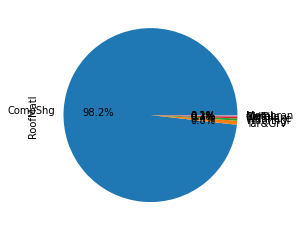

In [35]:
#
#    lets check how many  percentage  are same type of value
df['RoofMatl'].value_counts().plot.pie(autopct= '%1.1f%%')       # 98 percent of value are same type 

<AxesSubplot:ylabel='Heating'>

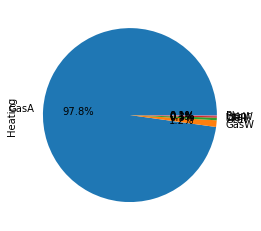

In [36]:
#
  # lets check how many  percentage  are same type of value
df['Heating'].value_counts().plot.pie(autopct= '%1.1f%%')       # 98 percent of value are same type 

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

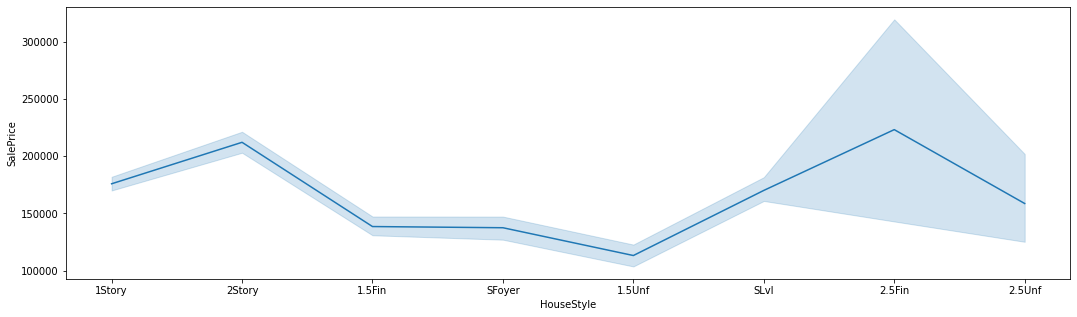

In [61]:
#Street, Utilities, Condition2, Heating, RoofStyle,GarageCond 
plt.figure(figsize=(18,5))
sns.lineplot(df['HouseStyle'], df['SalePrice'])

In [182]:
# convert these Attributes values into numerical form from categorical form

df['ExterQual']= df['ExterQual'].map({'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['ExterCond']= df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual']= df['BsmtQual'].map({'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtCond']= df['BsmtCond'].map({'Po':0, 'Fa':1,'TA':2,'Gd':3,})
df['KitchenQual']= df['KitchenQual'].map({'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageQual']= df['GarageQual'].map({ 'Po':0, 'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageCond']= df['GarageCond'].map({'Po':0 ,'Fa':1,'TA':2,'Gd':3,'Ex':4})


In [38]:

df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL    74.680043     4928   Pave      IR1         Lvl   
1          20       RL    95.000000    15865   Pave      IR1         Lvl   
2          60       RL    92.000000     9920   Pave      IR1         Lvl   
3          20       RL   105.000000    11751   Pave      IR1         Lvl   
4          20       RL    74.680043    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  \
0  CompShg     Plywood     Plywood       None         0.0          2   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0          3   
2  CompShg     MetalSd     MetalSd       None         0.0          3   
3  CompShg     Plywood     Plywood    BrkFace       480.0          2   
4  CompShg     CemntBd     CmentBd      Stone       126.0          3   

   ExterCond Foundation  BsmtQual  BsmtCond BsmtExposure BsmtFinType1  \
0          2     CBlock         3         2           No          ALQ   
1          3      PConc         2         3           Gd          ALQ   
2          2      PConc         3         2           Av          GLQ   
3          2     CBlock         3         2           No          BLQ   
4          2     CBlock         3         2           No          ALQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         120          Unf           0        958         1078    GasA   
1         351          Rec         823       1043         2217    GasA   
2         862          Unf           0        255         1117    GasA   
3         705          Unf           0       1139         1844    GasA   
4        1246          Unf           0        356         1602    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        TA          Y      SBrkr       958         0             0   
1        Ex          Y      SBrkr      2217         0             0   
2        Ex          Y      SBrkr      1127       886             0   
3        Ex          Y      SBrkr      1844         0             0   
4        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1            2             5        Typ           1     Attchd   
1             1            3             8        Typ           1     Attchd   
2             1            2             8        Typ           1     Attchd   
3             1            2             7        Typ           1     Attch

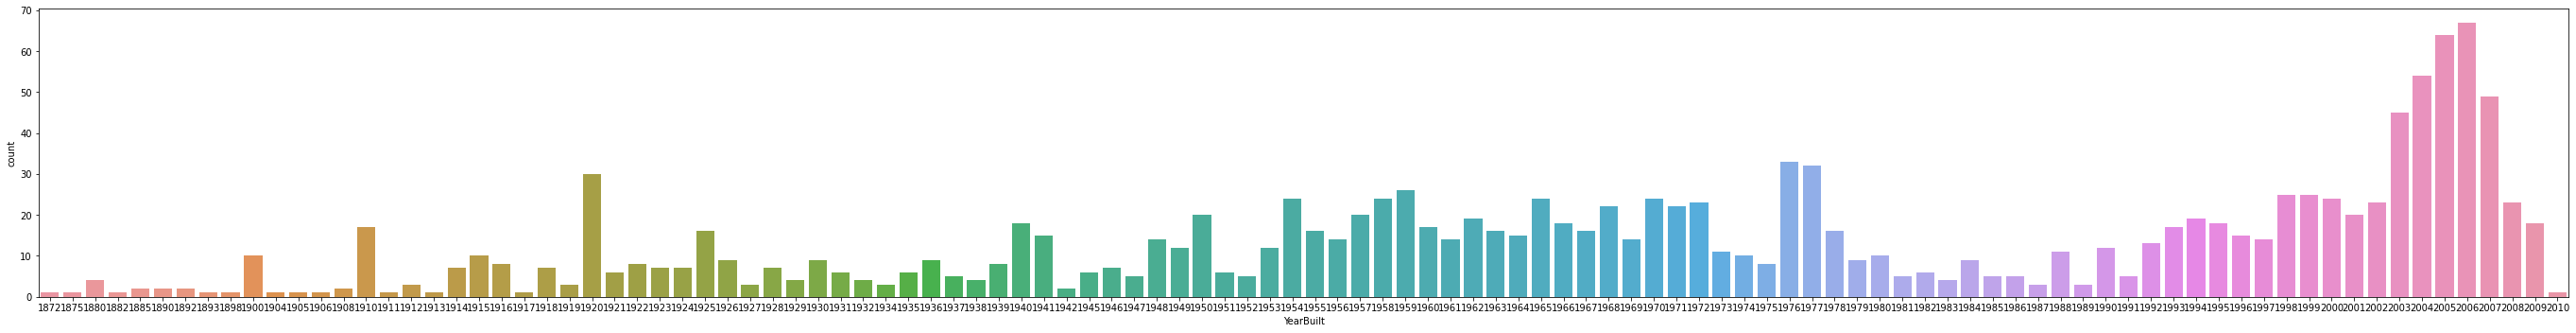

In [119]:
plt.figure(figsize=(38,5))
sns.countplot(df['YearBuilt'])     # plotting countplot of to see in which year maximum houses are built
plt.tight_layout()

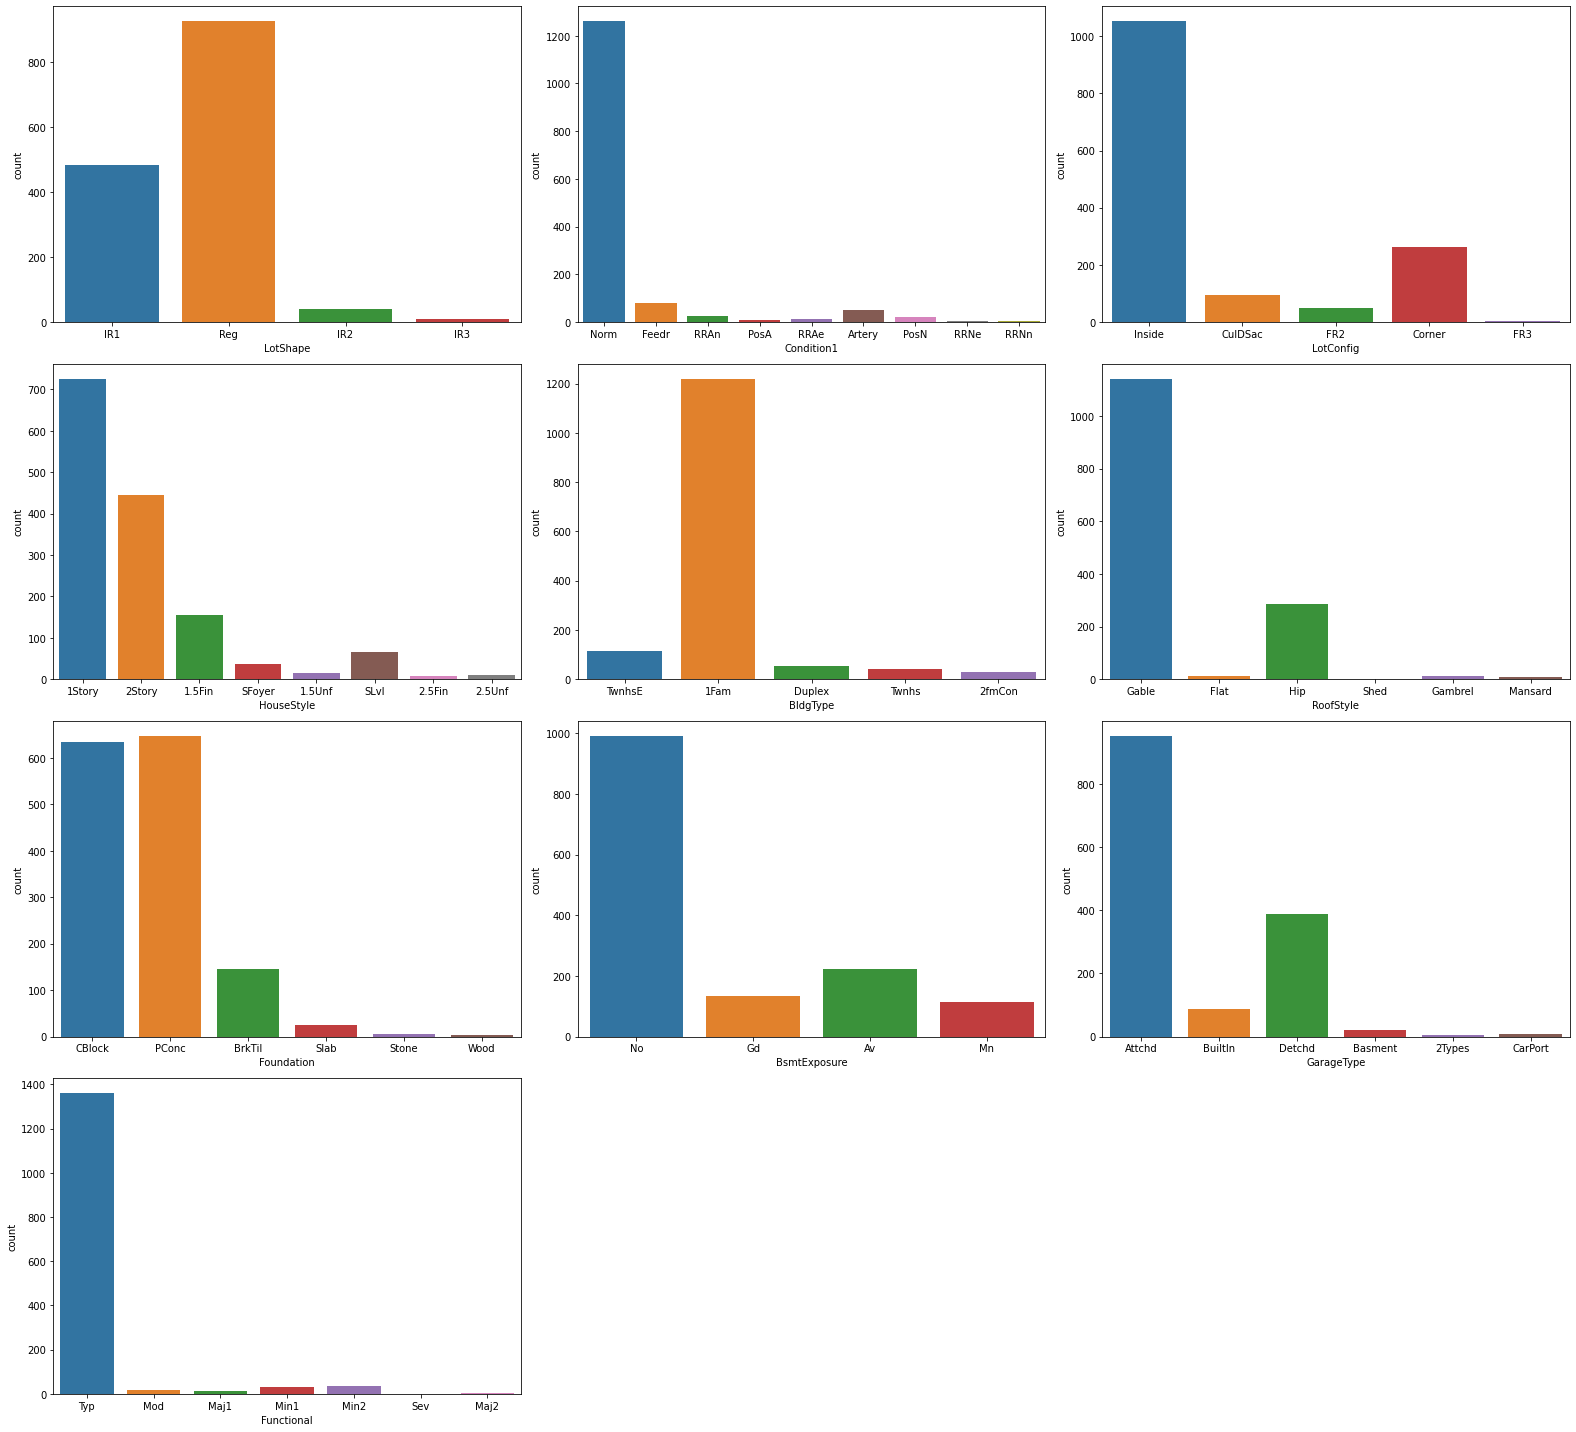

In [40]:
#
col= ['LotShape','Condition1','LotConfig','HouseStyle','BldgType','RoofStyle','Foundation',
      'BsmtExposure','GarageType','Functional']

    # lets see plotting countplot of some categorical Attributes
plt.figure(figsize=(22,20))
p=1
for c in col:
    if p <=14:
        ax = plt.subplot(4,3,p)
        sns.countplot(df[c])
        plt.xlabel=(c)
        plt.tight_layout()
    p+=1    
plt.show()        

#  the countplot shows that in some Attributes the same value too much so i thinking to dropped this Attributes
#  which Attributes have the same value too much then there is no any use to keeping those Attributes or those not important
#    for predicting the Target

In [41]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL    74.680043     4928   Pave      IR1         Lvl   
1          20       RL    95.000000    15865   Pave      IR1         Lvl   
2          60       RL    92.000000     9920   Pave      IR1         Lvl   
3          20       RL   105.000000    11751   Pave      IR1         Lvl   
4          20       RL    74.680043    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  \
0  CompShg     Plywood     Plywood       None         0.0          2   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0          3   
2  CompShg     MetalSd     MetalSd       None         0.0          3   
3  CompShg     Plywood     Plywood    BrkFace       480.0          2   
4  CompShg     CemntBd     CmentBd      Stone       126.0          3   

   ExterCond Foundation  BsmtQual  BsmtCond BsmtExposure BsmtFinType1  \
0          2     CBlock         3         2           No          ALQ   
1          3      PConc         2         3           Gd          ALQ   
2          2      PConc         3         2           Av          GLQ   
3          2     CBlock         3         2           No          BLQ   
4          2     CBlock         3         2           No          ALQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         120          Unf           0        958         1078    GasA   
1         351          Rec         823       1043         2217    GasA   
2         862          Unf           0        255         1117    GasA   
3         705          Unf           0       1139         1844    GasA   
4        1246          Unf           0        356         1602    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        TA          Y      SBrkr       958         0             0   
1        Ex          Y      SBrkr      2217         0             0   
2        Ex          Y      SBrkr      1127       886             0   
3        Ex          Y      SBrkr      1844         0             0   
4        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1            2             5        Typ           1     Attchd   
1             1            3             8        Typ           1     Attchd   
2             1            2             8        Typ           1     Attchd   
3             1            2             7        Typ           1     Attch

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

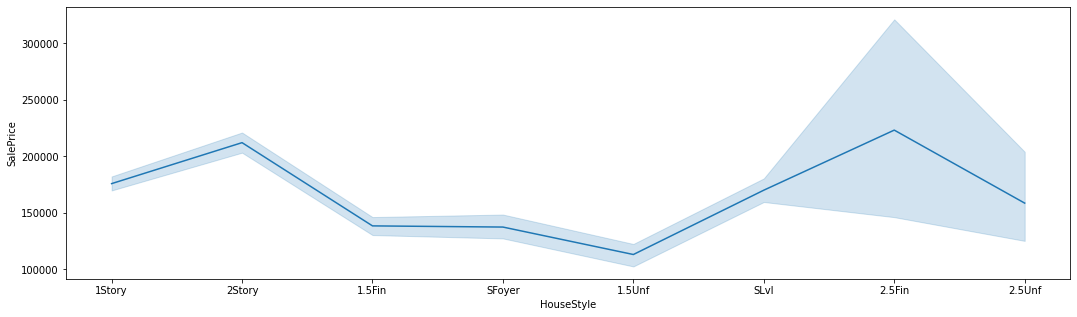

In [62]:
plt.figure(figsize=(18,5))
sns.lineplot(df['HouseStyle'], df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='LowQualFinSF'>

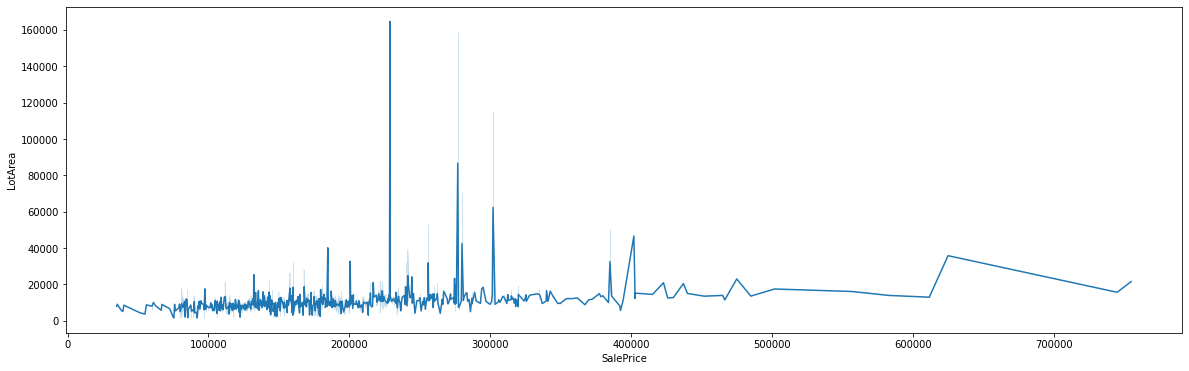

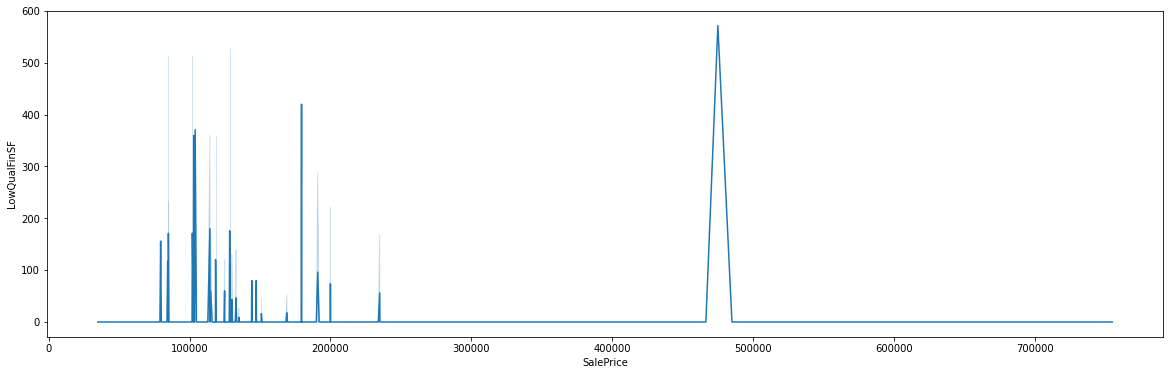

In [53]:

plt.figure(figsize=(20,6))
sns.lineplot(df['SalePrice'], df['LotArea'])
# the line plot shows that in 'LotArea' Attributes have a few outliers  

plt.figure(figsize=(20,6))
sns.lineplot(df['SalePrice'], df['LowQualFinSF'])
# the line plot shows that in 'LowQualFinSF' Attributes have some few outliers 

<AxesSubplot:xlabel='SalePrice', ylabel='PoolArea'>

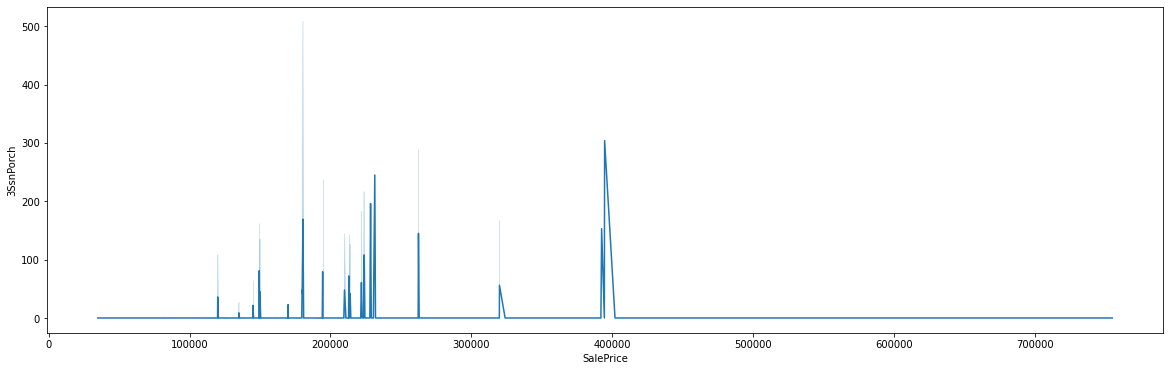

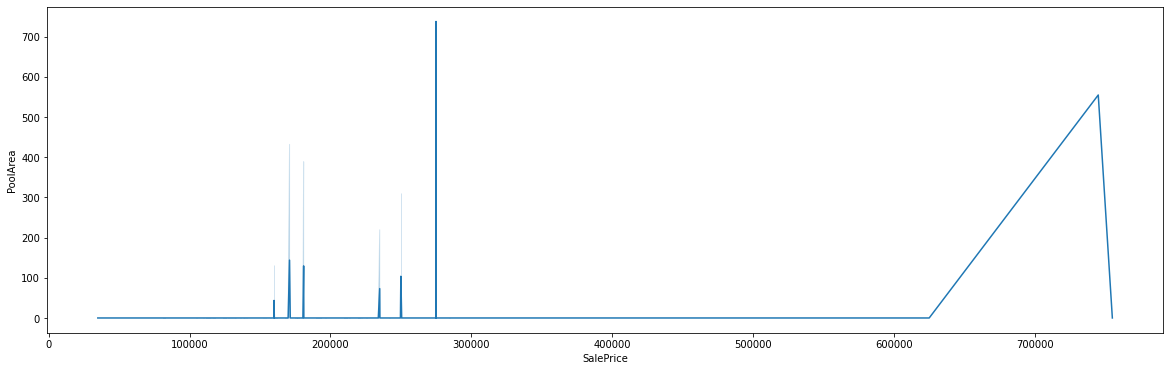

In [55]:

plt.figure(figsize=(20,6))
sns.lineplot(df['SalePrice'], df['3SsnPorch'])
# the line plot shows that in '3SsnPorch' Attributes have a few outliers  

plt.figure(figsize=(20,6))
sns.lineplot(df['SalePrice'], df['PoolArea'])
# the line plot shows that in 'ScreenPorch' Attributes have some few outliers 

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

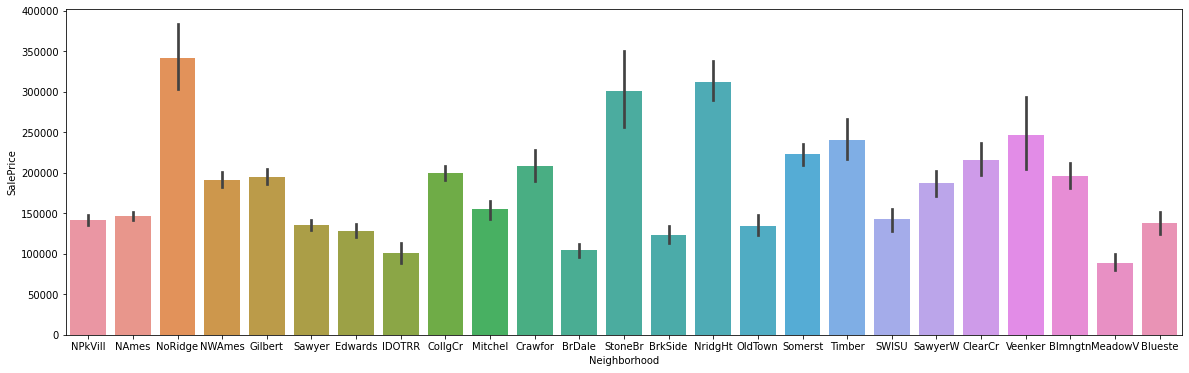

In [142]:

plt.figure(figsize=(20,6))
sns.barplot(df['Neighborhood'], df['SalePrice'])
#
#  the house whose  Neighborhood are (NoRidge,StoneBr,NridgHT) ,its price is high

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

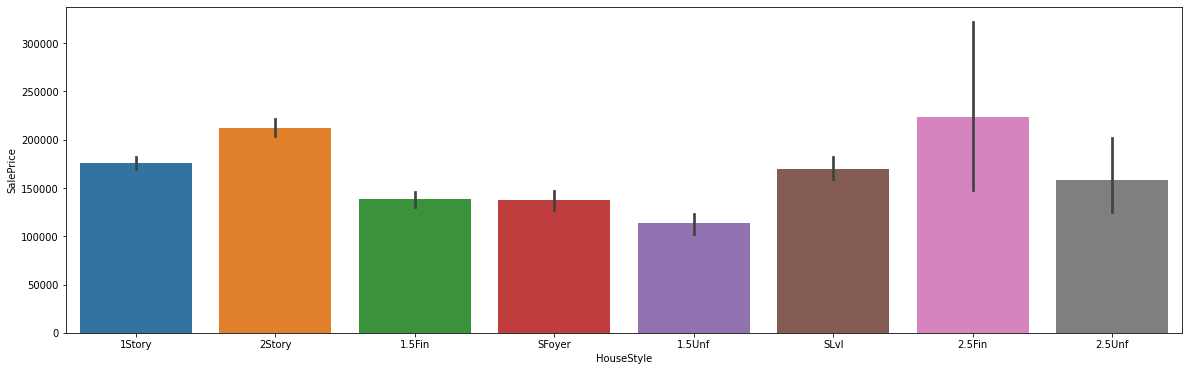

In [145]:

plt.figure(figsize=(20,6))
sns.barplot(df['HouseStyle'], df['SalePrice'])
# the barplot shows that there is no more SalePrice differences with variables of 'HouseStyle'

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

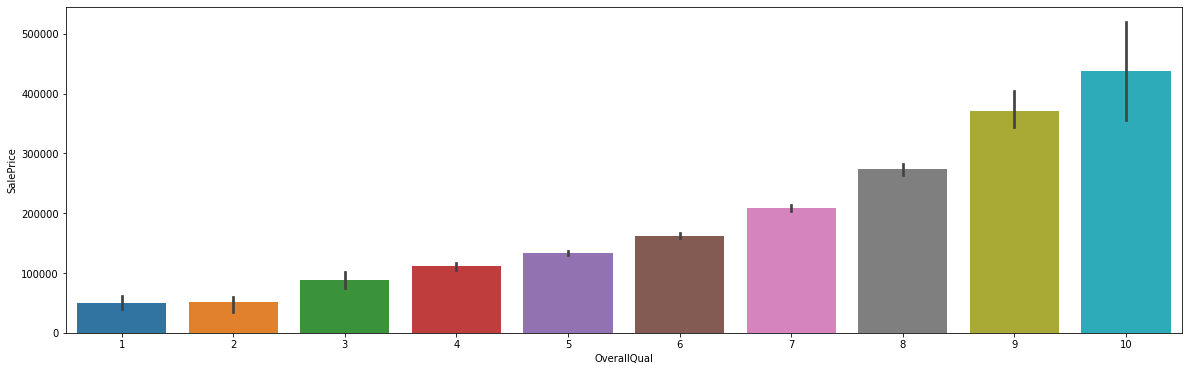

In [149]:
plt.figure(figsize=(20,6))
sns.barplot(df['OverallQual'], df['SalePrice'])
#
# the barplot shows that it Attributes is important to predict the SalePrice
 #  just as the  'OverallQual' increasing in the same way SalePrice also increading, positive correlation

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

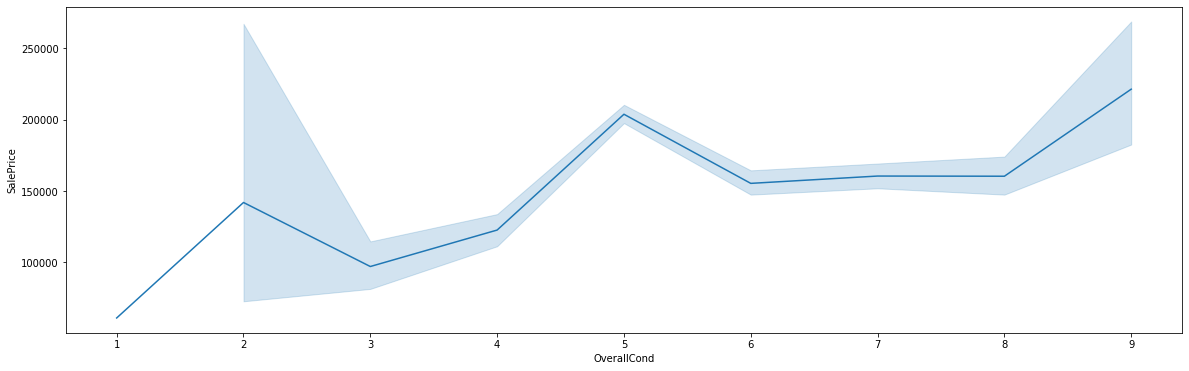

In [151]:
plt.figure(figsize=(20,6))
sns.lineplot(df['OverallCond'], df['SalePrice'])
# OverallCond it positive related to SalePrice
# the house whose OverallCondition is very excellent or execllent its SalePrice is also high and  
#  whose OverallCondition is very low or low its SalePrice is also low  

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

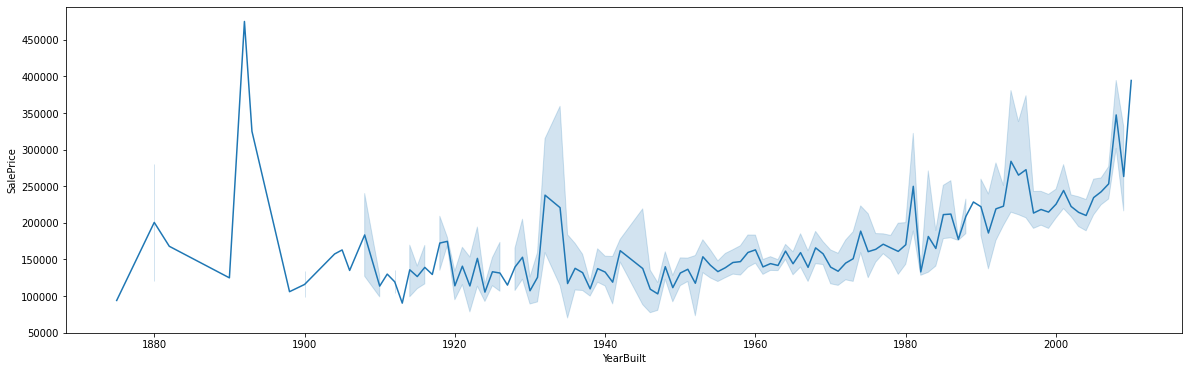

In [152]:
plt.figure(figsize=(20,6))
sns.lineplot(df['YearBuilt'], df['SalePrice'])
# the line shows that 'YearBuilt' is increasing after 1940 so SalePrice also increasing
#  

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

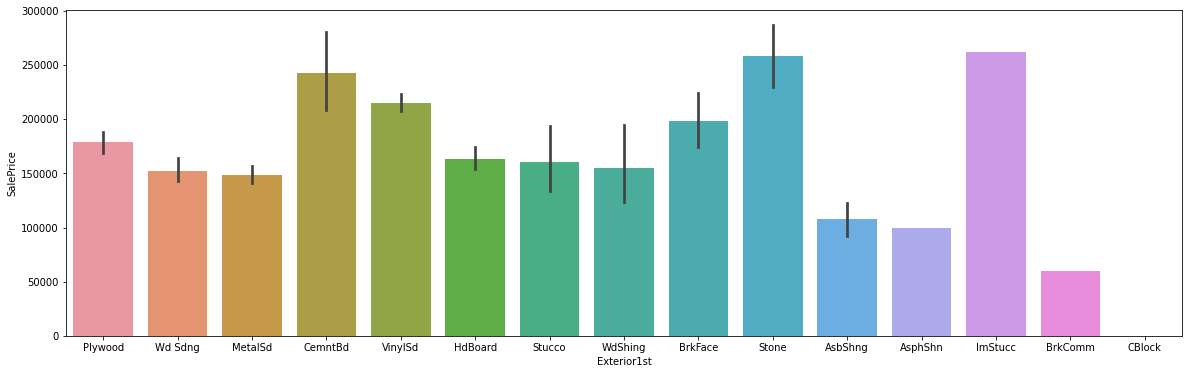

In [158]:

plt.figure(figsize=(20,6))
sns.barplot(df['Exterior1st'], df['SalePrice'])

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

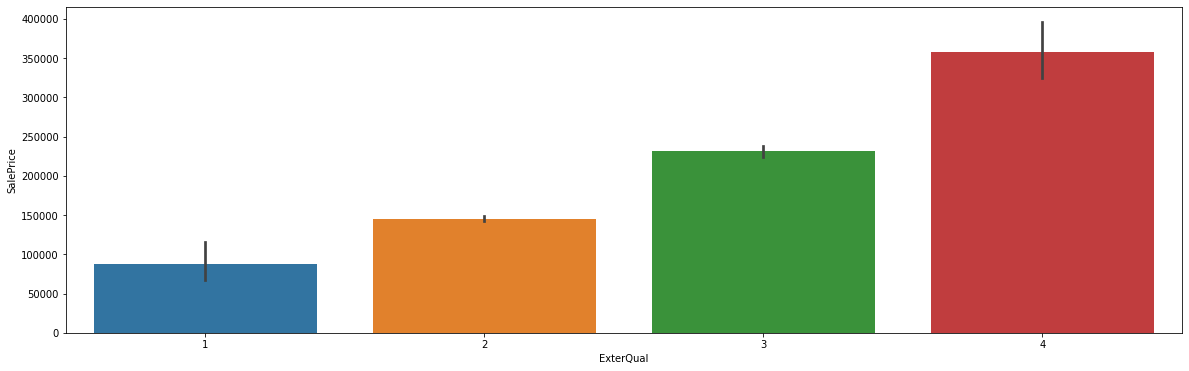

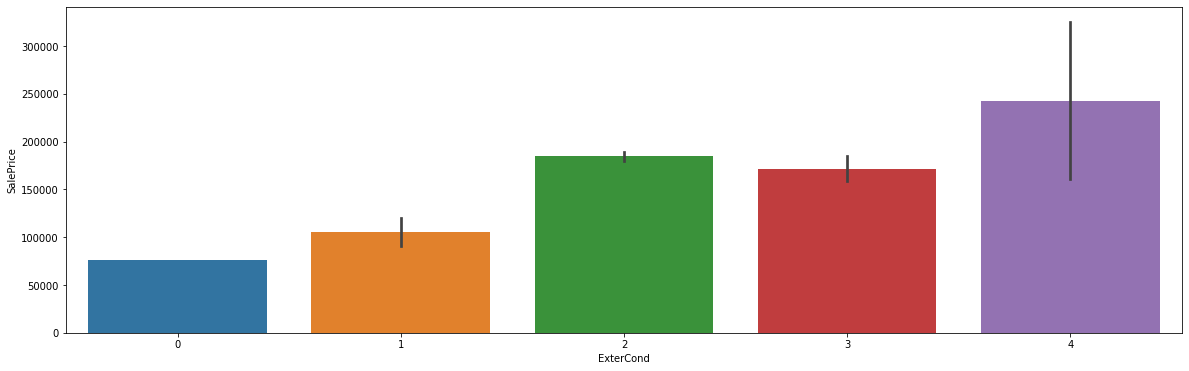

In [166]:
plt.figure(figsize=(20,6))
sns.barplot(df['ExterQual'], df['SalePrice'])
# this Attribute is positive related  to SallePrice means 'ExterQual'(Fa,TA,Gd,EX) increasing then also SalePrice increasing

plt.figure(figsize=(20,6))
sns.barplot(df['ExterCond'], df['SalePrice'])

# both Attributes are same  type because both are increasing then  SalePrice is also increasing

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

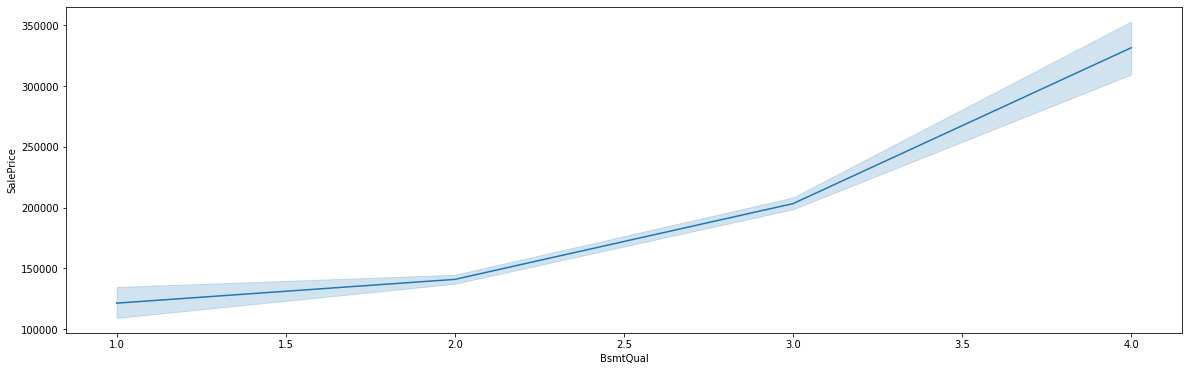

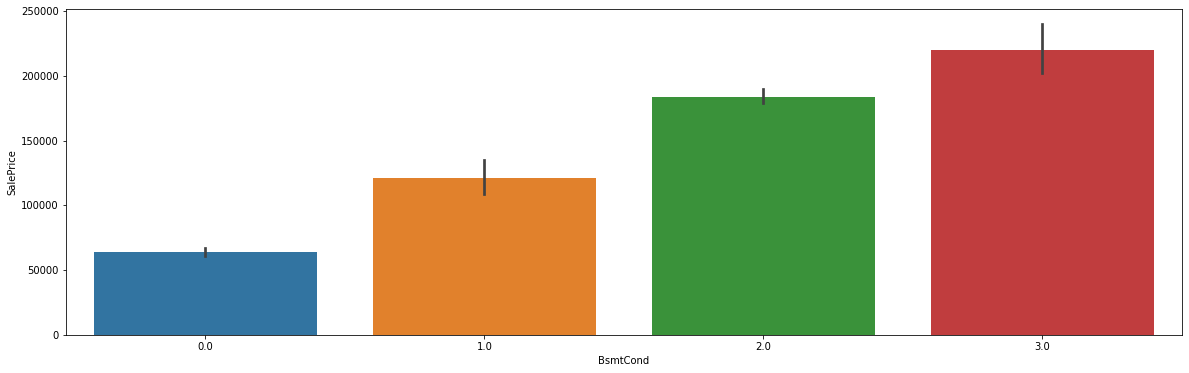

In [170]:
 # plotting lineplot  'BsmtQual' vs  'SalePrice'
plt.figure(figsize=(20,6))                        
sns.lineplot(df['BsmtQual'], df['SalePrice'])


 # plotting lineplot  'BsmtCond' vs  'SalePrice'
plt.figure(figsize=(20,6))
sns.barplot(df['BsmtCond'], df['SalePrice'])

# these both Attributes are positive related to SalePrice

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

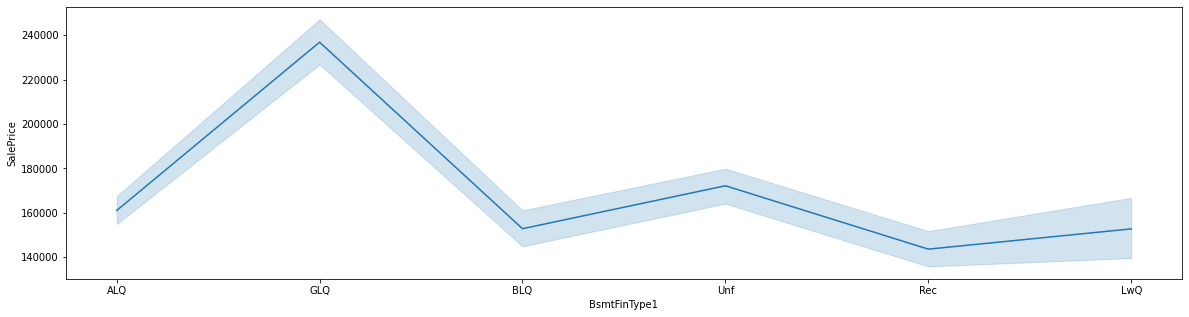

In [179]:

 # plotting lineplot  'BsmtFinType1' vs  'SalePrice'
plt.figure(figsize=(20,5))                        
sns.lineplot(df['BsmtFinType1'], df['SalePrice'])
# which house basmentfinish is goodQuality(GLQ) those price is also higher compare to  LwQ(lowQuality)

<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

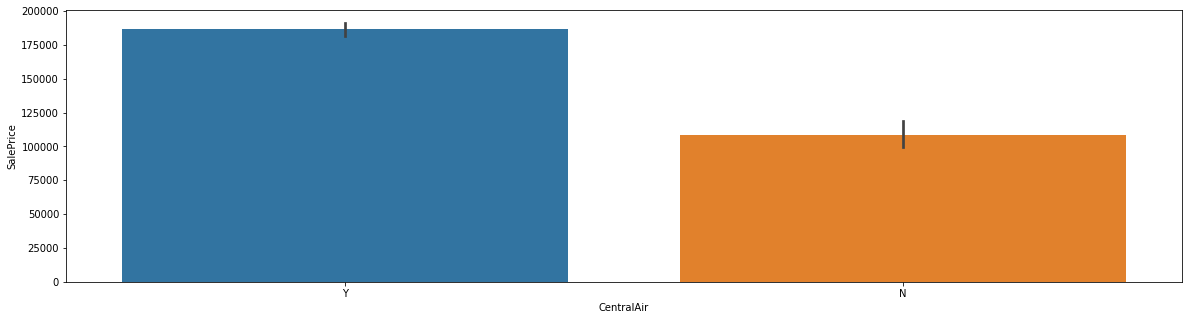

In [178]:

 # plotting barplot  'CentralAir' vs  'SalePrice'
plt.figure(figsize=(20,5))                        
sns.barplot(df['CentralAir'], df['SalePrice'])
#The house whose CentralAir equal to Yes its SalePrice is some higher compare to No

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

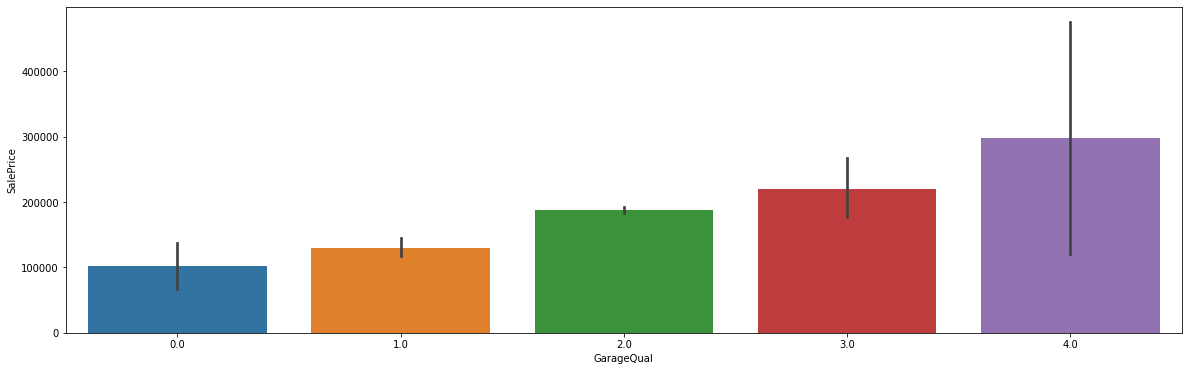

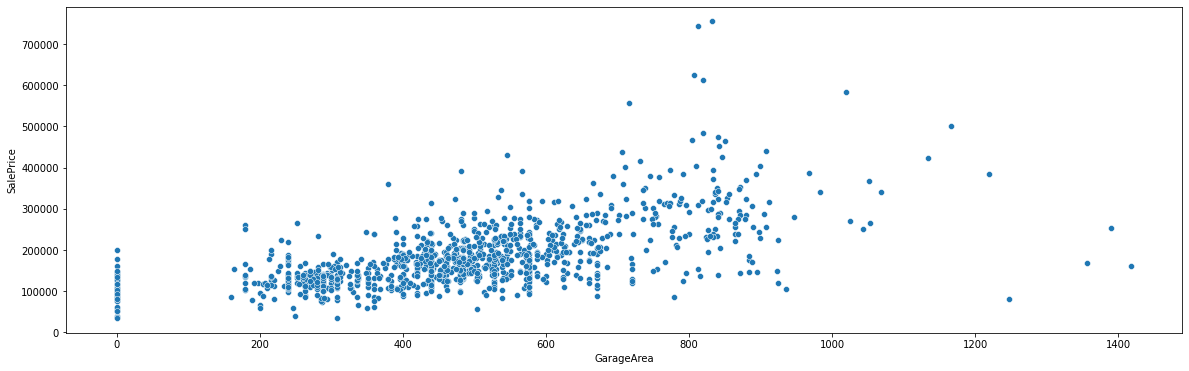

In [183]:

plt.figure(figsize=(20,6))                        
sns.barplot(df['GarageQual'], df['SalePrice'])      # plotting barplot  'GarageQual' vs  'SalePrice'


plt.figure(figsize=(20,6))                        
sns.scatterplot(df['GarageArea'], df['SalePrice'])   # plotting barplot  'GarageArea' vs  'SalePrice'

# both Attributes are positive correlated to SalePrice means ( GarageQual,GarageArea) value are increasing then its SalePrice
#    is also increasing

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

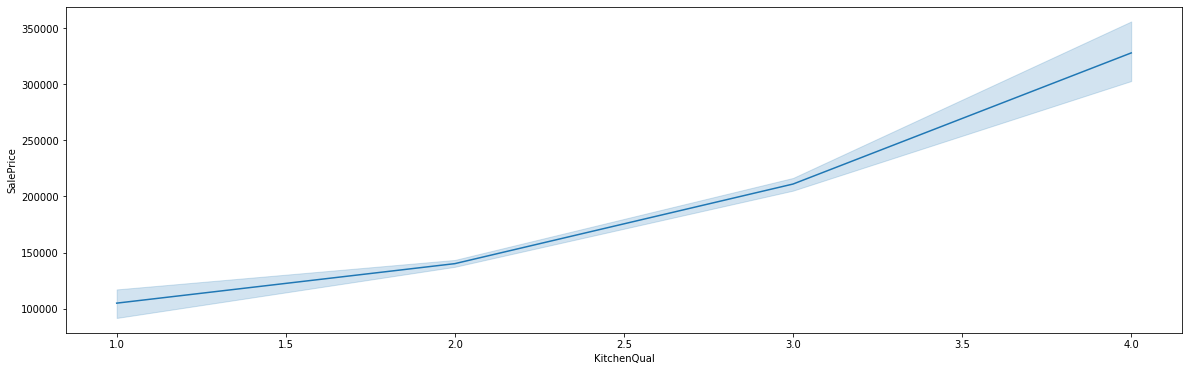

In [184]:
# plotting lineplot  'KitchenQual' vs  'SalePrice'
plt.figure(figsize=(20,6))                        
sns.lineplot(df['KitchenQual'], df['SalePrice'])

# 'KitchenQual' & 'SalePrice' both are positive related to each other 

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

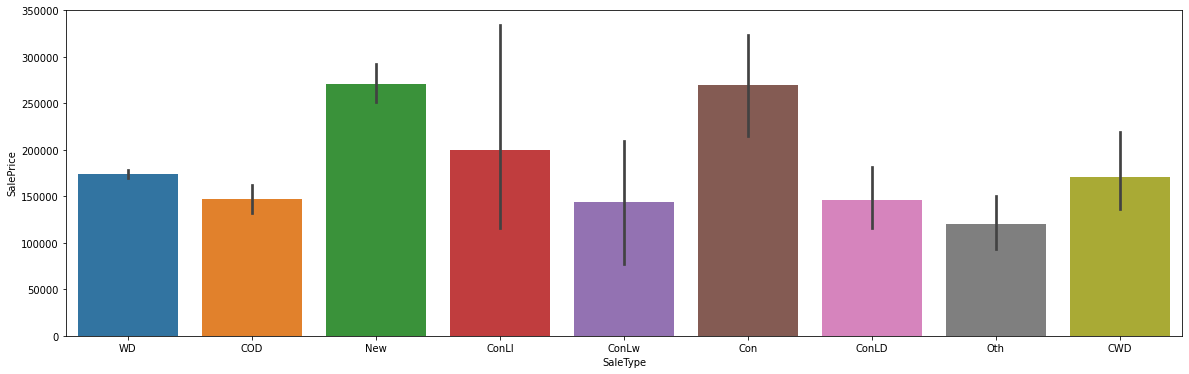

In [189]:
# plotting barplot  'SaleType' vs  'SalePrice'
plt.figure(figsize=(20,6))                        
sns.barplot(df['SaleType'], df['SalePrice'])



<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

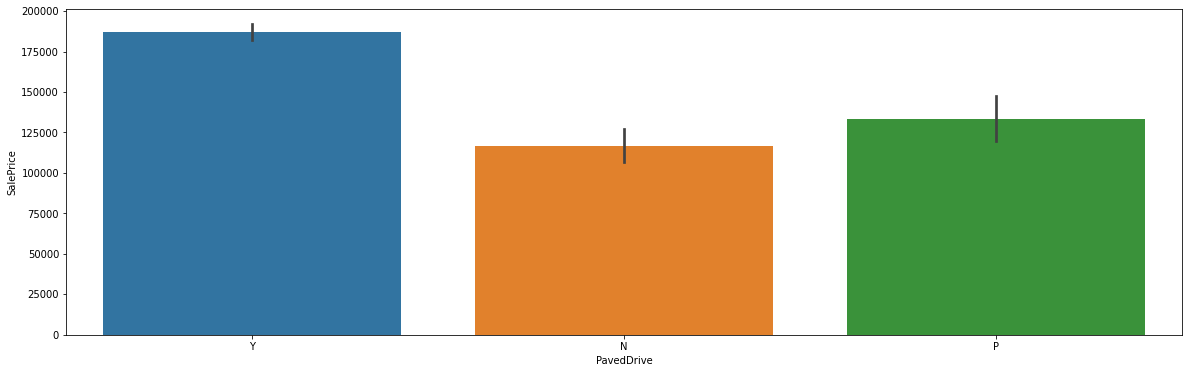

In [65]:

# plotting barplot  'PavedDrive' vs  'SalePrice'
plt.figure(figsize=(20,6))                        
sns.barplot(df['PavedDrive'], df['SalePrice'])

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

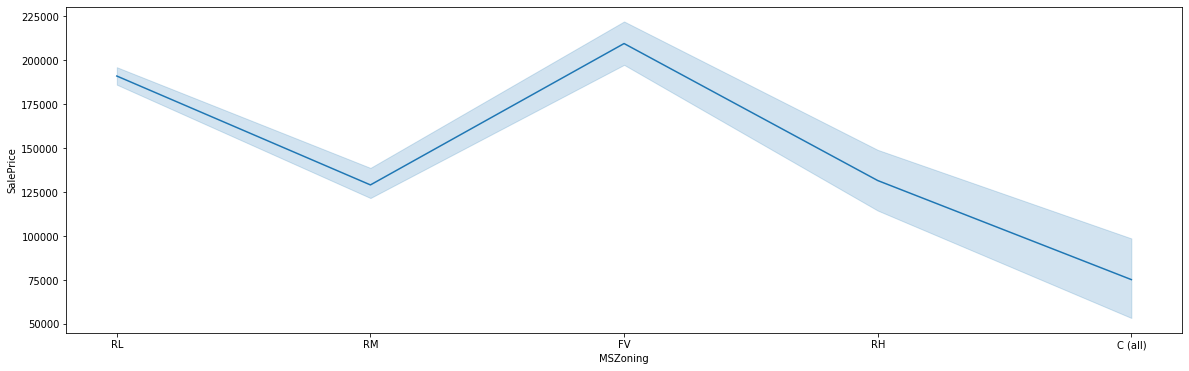

In [67]:
# plotting barplot  'PavedDrive' vs  'SalePrice'
plt.figure(figsize=(20,6))                        
sns.lineplot(df['MSZoning'], df['SalePrice'])
#  house price in FV(floating residential village) is high

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

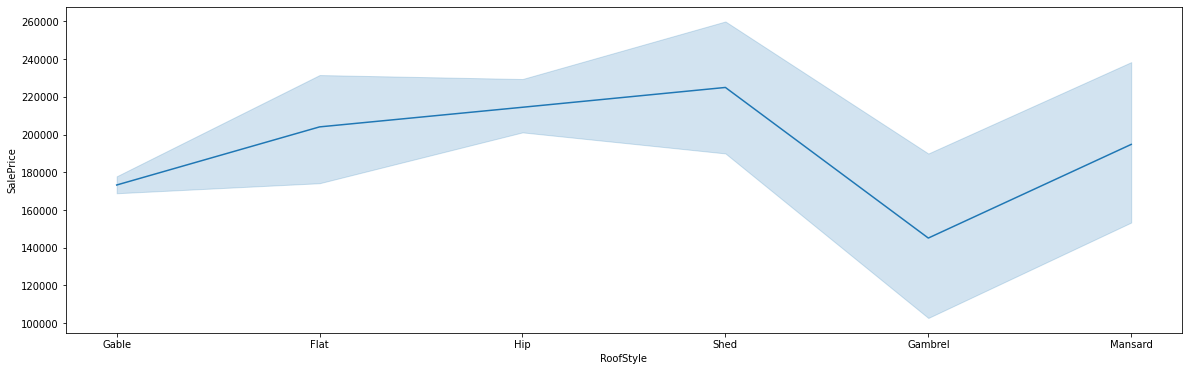

In [69]:
# plotting lineplot  'RoofStyle' vs  'SalePrice'
plt.figure(figsize=(20,6))                        
sns.lineplot(df['RoofStyle'], df['SalePrice'])

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

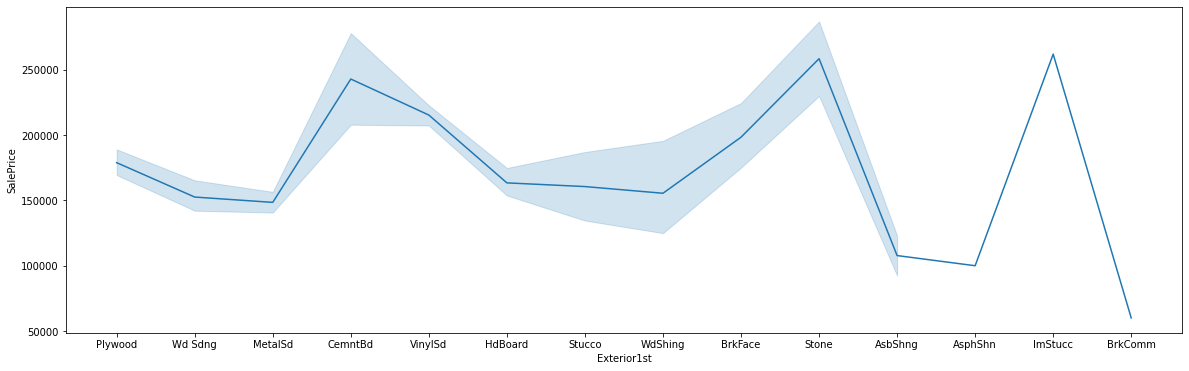

In [70]:
# plotting lineplot  'Exterior1st' vs  'SalePrice'
plt.figure(figsize=(20,5))                        
sns.lineplot(df['Exterior1st'], df['SalePrice'])
                # Exterior1st= (CemntBd,Stone, ImStucc), then house SalePrice is maximum

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

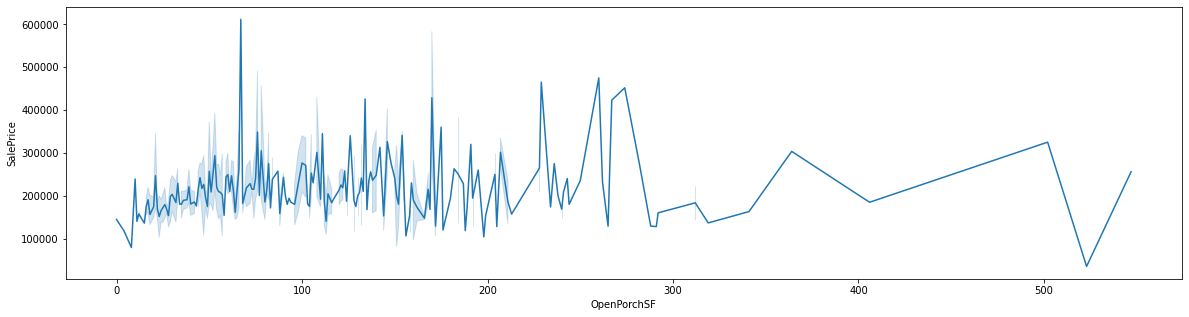

In [71]:

# plotting lineplot  'OpenPorchSF' vs  'SalePrice'
plt.figure(figsize=(20,5))                        
sns.lineplot(df['OpenPorchSF'], df['SalePrice'])

# a few value are more than 300 otherwise 99 percent value less than 300 so it seem outliers

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

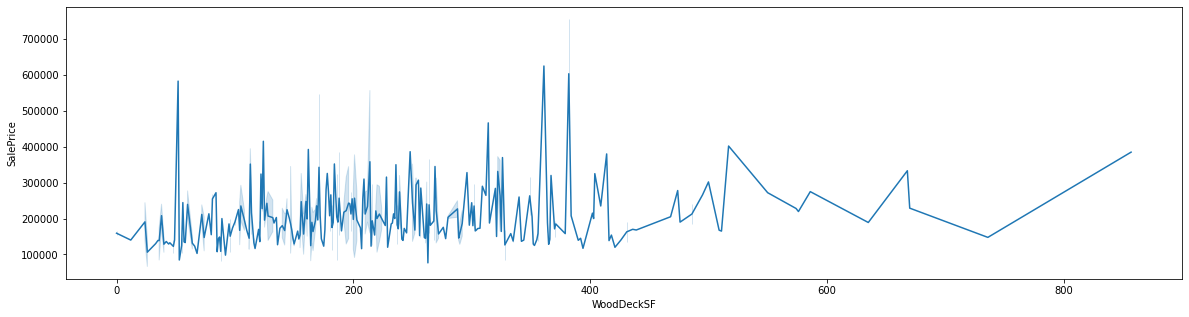

In [74]:

# plotting lineplot  'WoodDeckSF' vs  'SalePrice'
plt.figure(figsize=(20,5))                                        
sns.lineplot(df['WoodDeckSF'], df['SalePrice'])          
# a few value are more than 300 otherwise 99 percent value less than 300 so it seem outliers

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

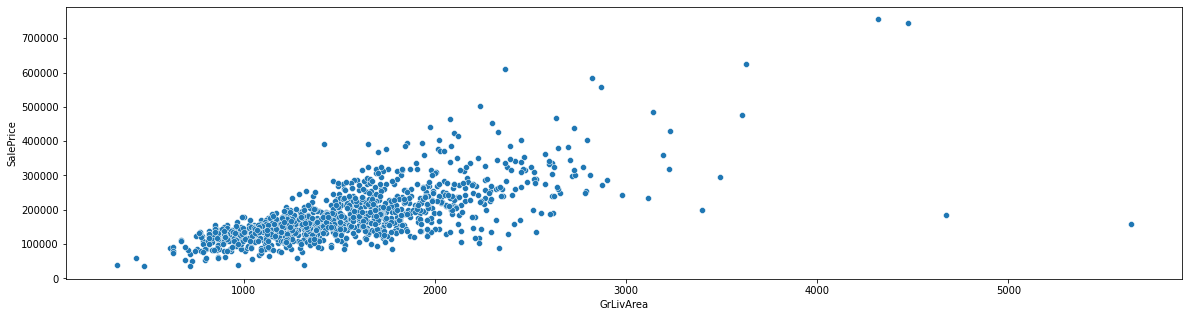

In [364]:

plt.figure(figsize=(20,5))                                        
sns.scatterplot(train['GrLivArea'], train['SalePrice'])
# we can see in this scaaterplot ,when GrLivArea value are increasing then SalePrice also increasing
#   means both  postive related

In [362]:
train.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       1977.0          RFn           2         440         TA   
1     Attchd       1970.0          Unf           2         621         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0          205              0          0   
1         TA          Y          81          207              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2007   
1          224         0    NaN   NaN         NaN        0      10    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     128000  
1       WD        Normal     268000

In [183]:
#  these are Ordinal type value so convert into numeric value
df['BsmtFinType1']= df['BsmtFinType1'].map({'Unf':0 ,'LwQ':1 ,'GLQ':5 ,'ALQ':4 ,'BLQ':3 ,'Rec':2})
df['BsmtFinType2']= df['BsmtFinType2'].map({'Unf':0 ,'LwQ':1 ,'GLQ':5 ,'ALQ':4 ,'BLQ':3 ,'Rec':2})
df['HeatingQC']= df['HeatingQC'].map({'Po':0 ,'Fa':1 ,'TA':2 ,'Gd':3 ,'Ex':4 })
df['GarageFinish']= df['GarageFinish'].map({'Unf':0 ,'RFn':1 ,'Fin':2 })


In [ ]:
 LETS APPLY LABEL ENCODER

In [185]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    d=le.fit_transform(df[i])
    df[i]=d

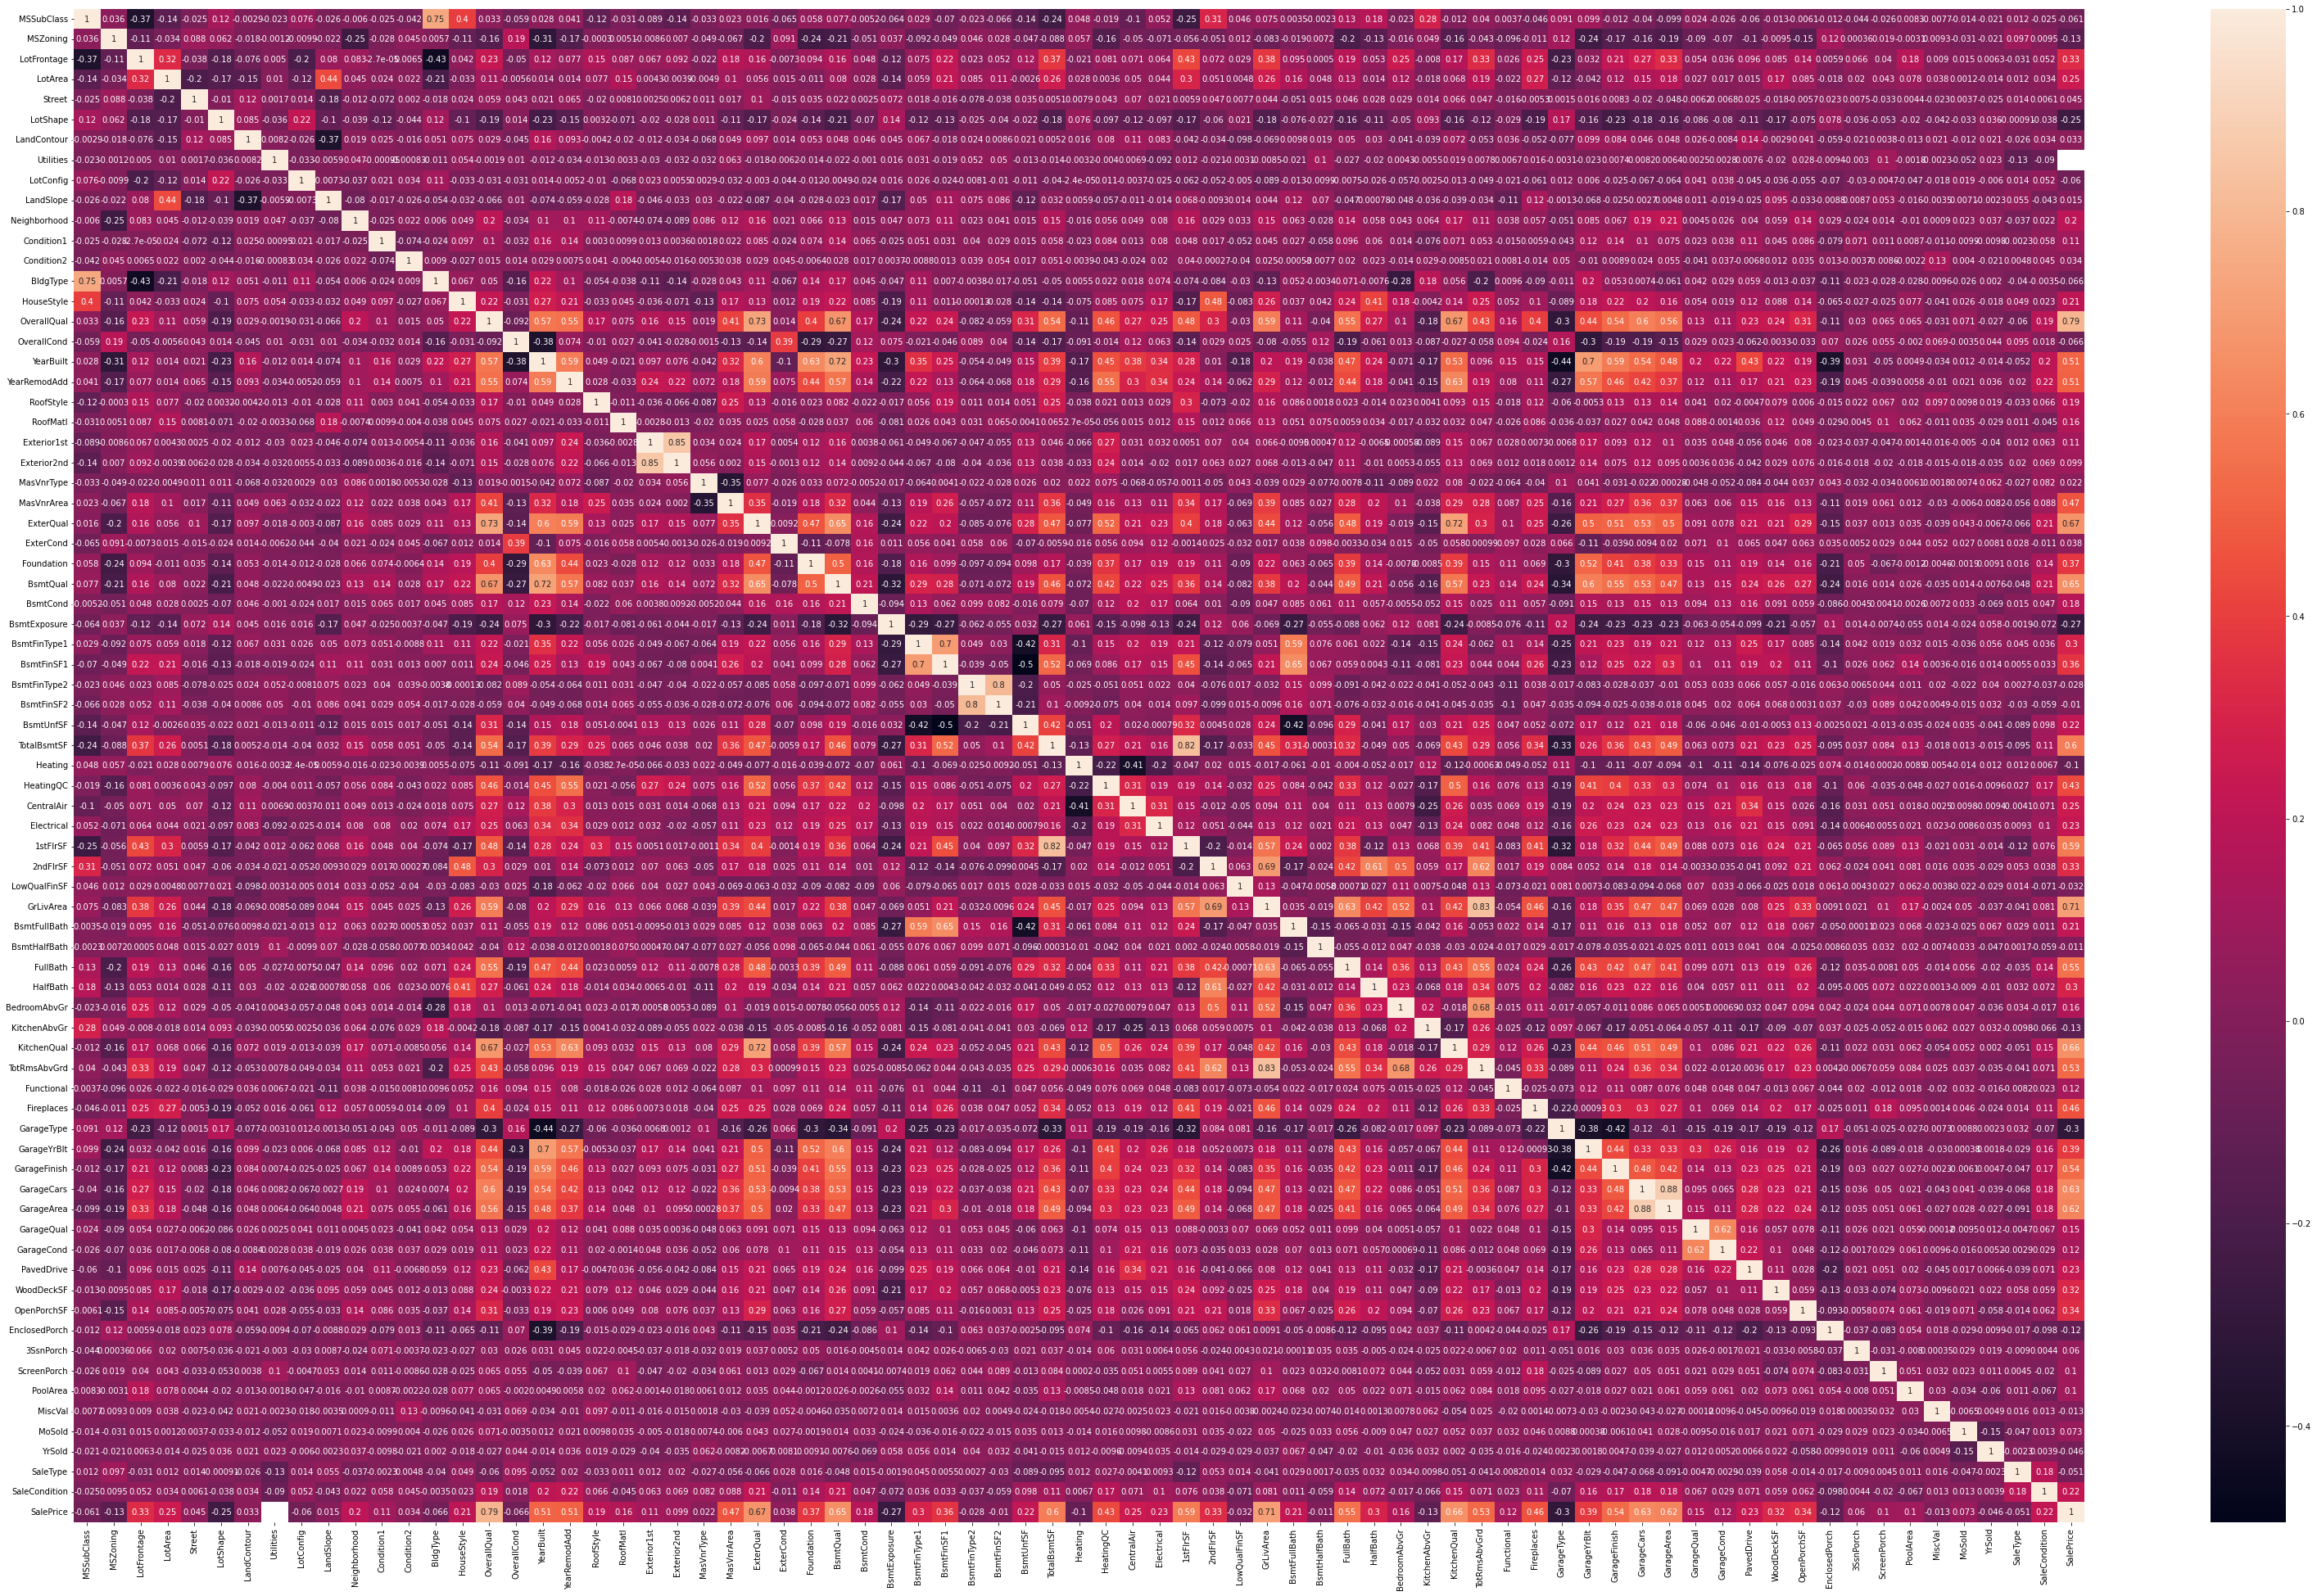

In [78]:
# PLOTTING HEATMAP OF DATASET CORRELATION

plt.figure(figsize=(55,34))
sns.heatmap(df.corr(), annot=True)
#plt.savefig('housing.jpg')

# The size of this plot is so big , so after saving it and then analyzed 

In [186]:
#
df= df.drop(['Street','Condition2','RoofMatl','Heating','Utilities'], axis=1)

In [81]:

#  plotting pairplot
plt.figure(figsize=(75,60))
sns.pairplot(df)

KeyboardInterrupt: 

<Figure size 5400x4320 with 0 Axes>

Error in callback <function flush_figures at 0x000001D0BD635E10> (for post_execute):


KeyboardInterrupt: 

In [187]:
X = df.iloc[0:1168].drop('SalePrice', axis=1)
Y = df.iloc[0:1168]['SalePrice']

In [101]:
# make sure to  use 'variance_inflation_factor' method to check  multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
features= X.columns
vif_value= [vif(X.values, i) for i in range(len(X.columns))]

pd.DataFrame({'features':features,'vif_value':vif_value})   #

features     vif_value
0      MSSubClass  1.399534e+01
1        MSZoning  3.107041e+01
2     LotFrontage  2.017204e+01
3         LotArea  3.853714e+00
4        LotShape  3.626248e+00
5     LandContour  2.149339e+01
6       LotConfig  5.068860e+00
7       LandSlope  1.642235e+00
8    Neighborhood  6.393089e+00
9      Condition1  7.325118e+00
10       BldgType  5.289760e+00
11     HouseStyle  8.239774e+00
12    OverallQual  8.609364e+01
13    OverallCond  5.502044e+01
14      YearBuilt  3.438502e+04
15   YearRemodAdd  2.810455e+04
16      RoofStyle  4.878945e+00
17    Exterior1st  4.045248e+01
18    Exterior2nd  3.838131e+01
19     MasVnrType  1.145675e+01
20     MasVnrArea  2.212958e+00
21      ExterQual  5.985981e+01
22      ExterCond  4.597540e+01
23     Foundation  1.005174e+01
24       BsmtQual  4.999110e+01
25       BsmtCond  5.842638e+01
26   BsmtExposure  7.424333e+00
27   BsmtFinType1  6.608166e+00
28     BsmtFinSF1           inf
29   BsmtFinType2  3.245983e+00
30     BsmtFinSF2           inf
31      BsmtUnfSF           inf
32    TotalBsmtSF           inf
33      HeatingQC  2.179979e+01
34     CentralAir  2.335291e+01
35     Electrical  1.836799e+01
36       1stFlrSF           inf
37       2ndFlrSF           inf
38   LowQualFinSF           inf
39      GrLivArea           inf
40   BsmtFullBath  4.024052e+00
41   BsmtHalfBath  1.305406e+00
42       FullBath  2.899902e+01
43       HalfBath  3.691469e+00
44   BedroomAbvGr  3.647897e+01
45   KitchenAbvGr  4.291821e+01
46    KitchenQual  4.259983e+01
47   TotRmsAbvGrd  9.174627e+01
48     Functional  4.360719e+01
49     Fireplaces  3.275330e+00
50     GarageType  4.427750e+00
51    GarageYrBlt  1.882743e+04
52   GarageFinish  3.908747e+00
53     GarageCars  3.907838e+01
54     GarageArea  3.491049e+01
55     GarageQual  1.287520e+02
56     GarageCond  1.336390e+02
57     PavedDrive  2.253035e+01
58     WoodDeckSF  2.041660e+00
59    OpenPorchSF  2.031918e+00
60  EnclosedPorch  1.495856e+00
61      3SsnPorch  1.076778e+00
62    ScreenPorch  1.242653e+00
63       PoolArea  1.187063e+00
64        MiscVal  1.074273e+00
65         MoSold  7.018149e+00
66         YrSold  4.734891e+04
67       SaleType  2.496600e+01
68  SaleCondition  1.497648e+01

In [188]:
df.drop(['YrSold','GarageYrBlt','GarageCond','KitchenAbvGr','GrLivArea','YearRemodAdd'], axis=1, inplace= True)

# dropped the columns because  multicollinearity problem

In [189]:
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
0         120         3    74.680043     4928         0            3   
1          20         3    95.000000    15865         0            3   
2          60         3    92.000000     9920         0            3   
3          20         3   105.000000    11751         0            3   
4          20         3    74.680043    16635         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  BldgType  HouseStyle  \
0          4          0            13           2         4           2   
1          4          1            12           2         0           2   
2          1          0            15           2         0           5   
3          4          0            14           2         0           2   
4          2          0            14           2         0           2   

   OverallQual  OverallCond  YearBuilt  RoofStyle  Exterior1st  Exterior2nd  \
0            6            5       1976          1            9           10   
1            8            6       1970          0           13           14   
2            7            5       1996          1            8            8   
3            6            6       1977          3            9           10   
4            6            7       1977          1            5            5   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0           2         0.0          2          2           1         3   
1           2         0.0          3          3           2         2   
2           2         0.0          3          2           2         3   
3           1       480.0          2          2           1         3   
4           3       126.0          3          2           1         3   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0         2             3             4         120             0           0   
1         3             1             4         351             2         823   
2         2             0             5         862             0           0   
3         2             3             3         705             0           0   
4         2             3             4        1246             0           0   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  \
0        958         1078          2           1           4       958   
1       1043         2217          4           1           4      2217   
2        255         1117          4           1           4      1127   
3       1139         1844          4           1           4      1844   
4        356         1602          3           1           4      1602   

   2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0         0             0             0             0         2         0   
1         0             0             1             0         2         0   
2       886             0             1             0         2         1   
3         0             0             0             0         2         0   
4         0             0             0             1         2         0   

   BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             2            2             5           6           1   
1             4            3             8           6           1   
2             3            2             8           6           1   
3             3            2             7           6           1   
4             3            3             8           6           1   

   GarageType  GarageFinish  GarageCars  GarageArea  GarageQual  PavedDrive  \
0           1             1           2         440           2           2   
1           1             0           2         621           2           2   
2           1             0           2         455           2           2   
3           1             1           2         546           2          

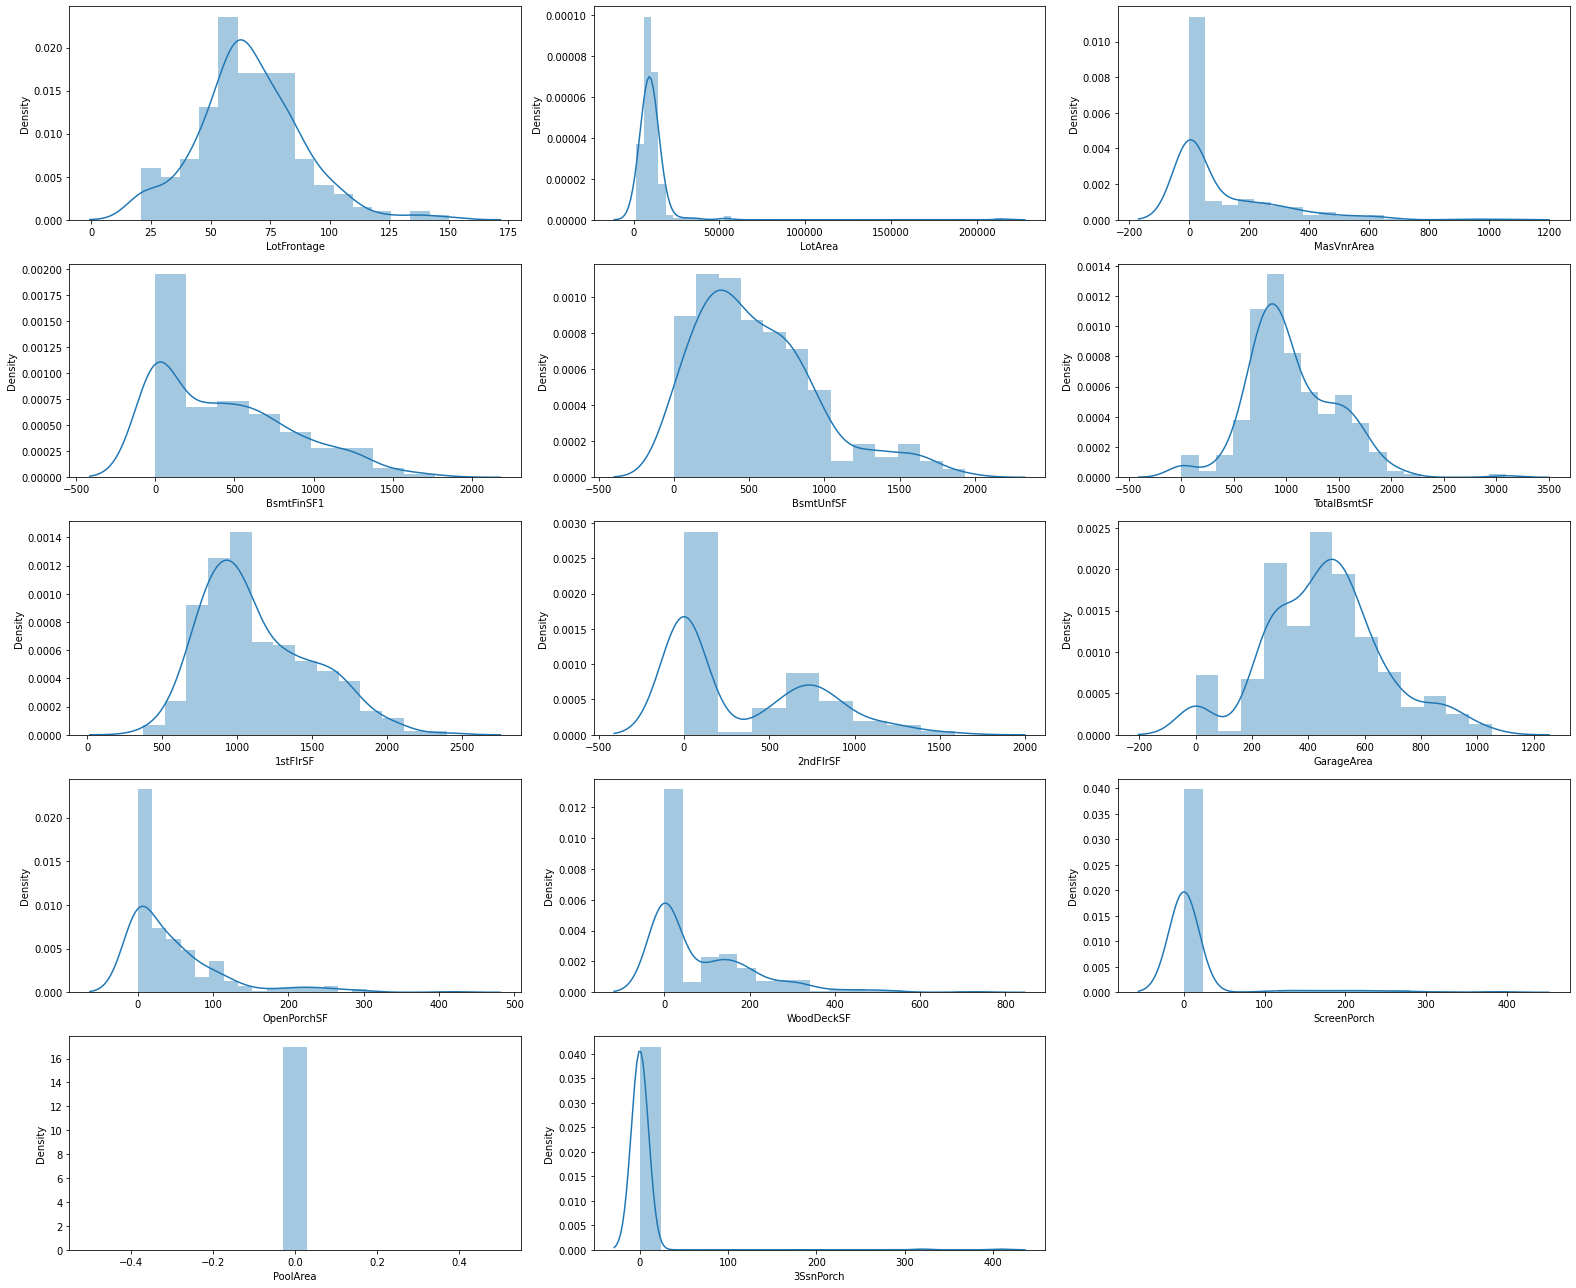

In [190]:
# plotting distribution plot of Continuous Attributes  of test data

col= ['LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
    'GarageArea','OpenPorchSF','WoodDeckSF','ScreenPorch','PoolArea','3SsnPorch']

plt.figure(figsize=(22,18))
p=1
for i in col:
    if p <=15:
        ax = plt.subplot(5,3,p)
        sns.distplot(test[i])
        plt.xlabel= i
        plt.tight_layout()
    p+=1    
plt.show()        # IN THIS distribution plots showing skewness

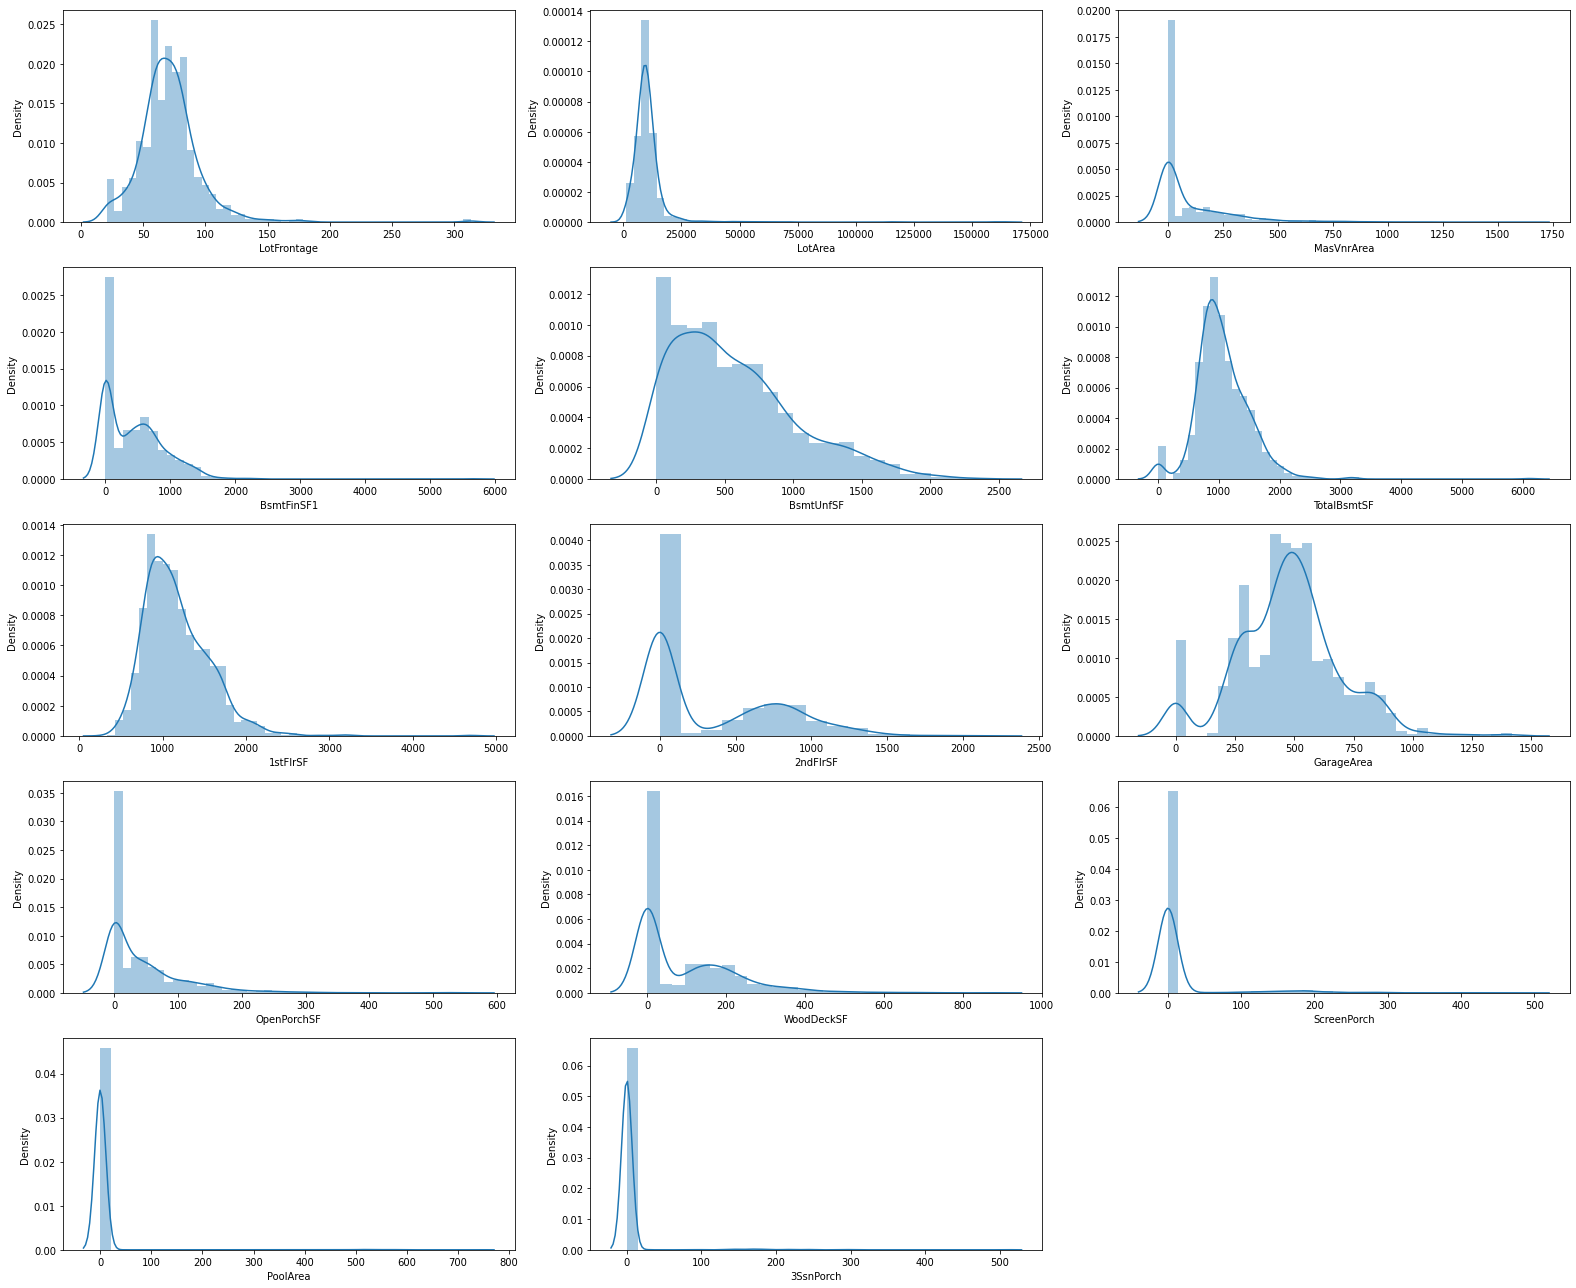

In [191]:

# plotting distribution plot of Continuous Attributes  of train data

plt.figure(figsize=(22,18))
p=1
for i in col:
    if p <=15:
        ax = plt.subplot(5,3,p)
        sns.distplot(train[i])
        plt.xlabel= i
        plt.tight_layout()
    p+=1    
plt.show()        # IN THIS distribution plots showing skewness

In [199]:
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
0         120         3    74.680043     4928         0            3   
1          20         3    95.000000    15865         0            3   
2          60         3    92.000000     9920         0            3   
3          20         3   105.000000    11751         0            3   
4          20         3    74.680043    16635         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  BldgType  HouseStyle  \
0          4          0            13           2         4           2   
1          4          1            12           2         0           2   
2          1          0            15           2         0           5   
3          4          0            14           2         0           2   
4          2          0            14           2         0           2   

   OverallQual  OverallCond  YearBuilt  RoofStyle  Exterior1st  Exterior2nd  \
0            6            5       1976          1            9           10   
1            8            6       1970          0           13           14   
2            7            5       1996          1            8            8   
3            6            6       1977          3            9           10   
4            6            7       1977          1            5            5   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0           2         0.0          2          2           1         3   
1           2         0.0          3          3           2         2   
2           2         0.0          3          2           2         3   
3           1       480.0          2          2           1         3   
4           3       126.0          3          2           1         3   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0         2             3             4         120             0           0   
1         3             1             4         351             2         823   
2         2             0             5         862             0           0   
3         2             3             3         705             0           0   
4         2             3             4        1246             0           0   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  \
0        958         1078          2           1           4       958   
1       1043         2217          4           1           4      2217   
2        255         1117          4           1           4      1127   
3       1139         1844          4           1           4      1844   
4        356         1602          3           1           4      1602   

   2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0         0             0             0             0         2         0   
1         0             0             1             0         2         0   
2       886             0             1             0         2         1   
3         0             0             0             0         2         0   
4         0             0             0             1         2         0   

   BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             2            2             5           6           1   
1             4            3             8           6           1   
2             3            2             8           6           1   
3             3            2             7           6           1   
4             3            3             8           6           1   

   GarageType  GarageFinish  GarageCars  GarageArea  GarageQual  PavedDrive  \
0           1             1           2         440           2           2   
1           1             0           2         621           2           2   
2           1             0           2         455           2           2   
3           1             1           2         546           2          

In [243]:
#  CHECKING SKEWNESS

D = df[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
    'GarageArea','OpenPorchSF','WoodDeckSF','ScreenPorch','3SsnPorch']]
D.skew()

LotFrontage     2.264016
LotArea        12.207688
MasVnrArea      2.676412
BsmtFinSF1      1.685503
BsmtUnfSF       0.920268
TotalBsmtSF     1.524255
1stFlrSF        1.376757
2ndFlrSF        0.813030
GarageArea      0.179981
OpenPorchSF     2.364342
WoodDeckSF      1.541376
ScreenPorch     4.122214
3SsnPorch      10.304342
dtype: float64

In [245]:
#  removing skewness

for index in D.skew().index:
    if D.skew().loc[index]> 0.5:
        D[index]= np.log1p(D[index])
    if D.skew().loc[index]< -0.5:
        D[index]= np.square(D[index])

In [246]:
D.skew()         #  checking  again skewness

LotFrontage   -0.375805
LotArea       -0.137404
MasVnrArea     0.481120
BsmtFinSF1    -0.380968
BsmtUnfSF     -1.105004
TotalBsmtSF   -3.445922
1stFlrSF       0.080114
2ndFlrSF       0.289643
GarageArea     0.179981
OpenPorchSF   -0.023397
WoodDeckSF     0.153537
ScreenPorch    3.150409
3SsnPorch      7.734975
dtype: float64

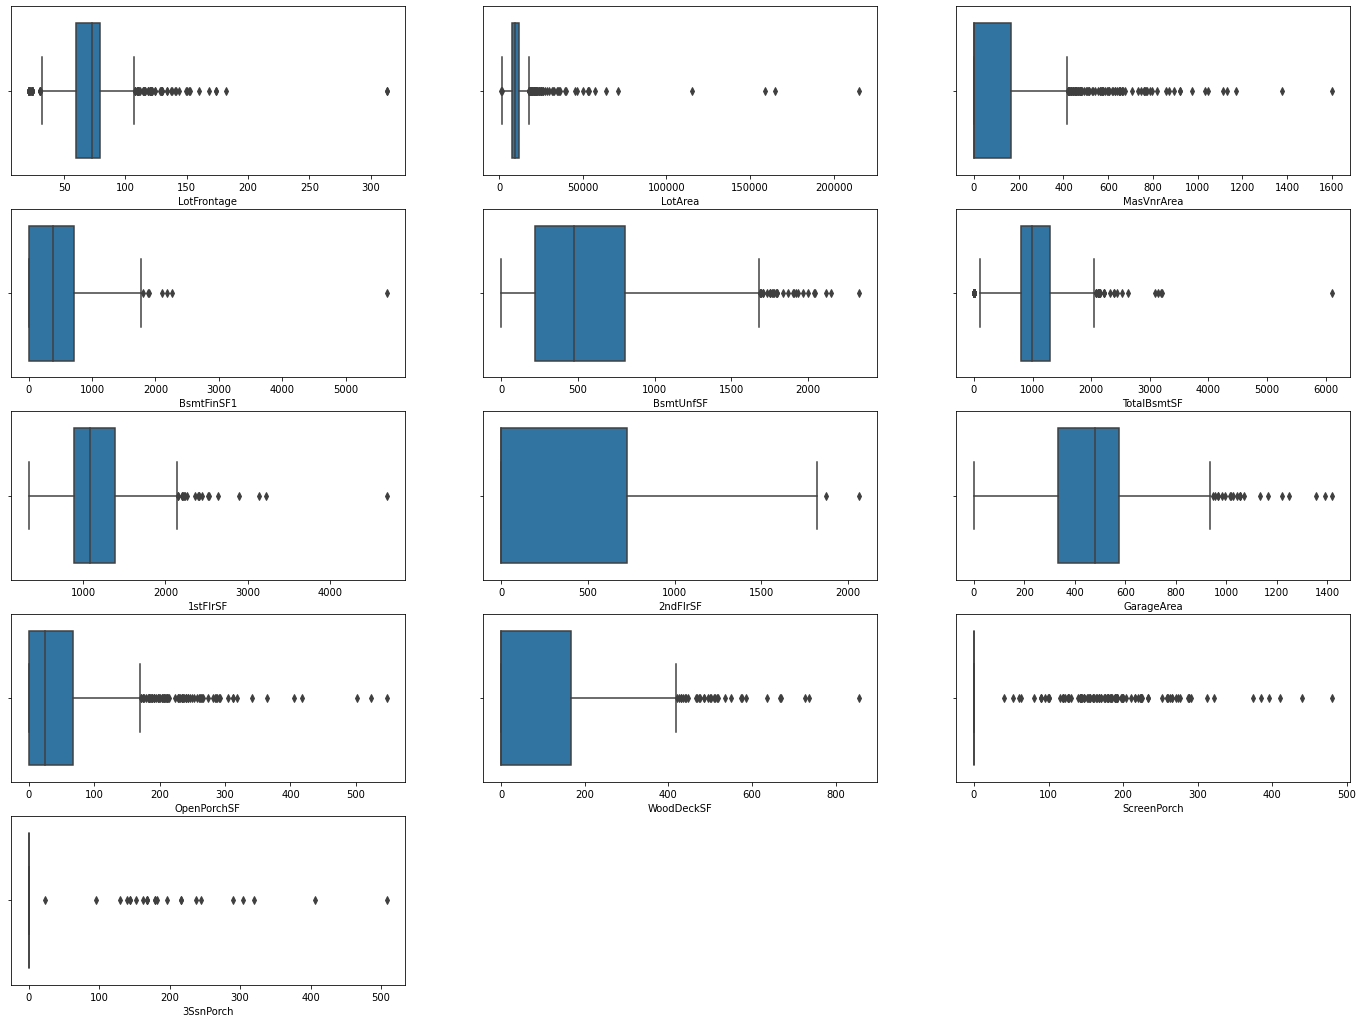

In [211]:
# plotting boxplot to check outliers

D = df[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
    'GarageArea','OpenPorchSF','WoodDeckSF','ScreenPorch','3SsnPorch']]
plt.figure(figsize=(24,18))
p= 1
for col in D:
    if p<=15:                                      
        ax=plt.subplot(5,3,p)                          
        sns.boxplot(D[col])
    p+=1
plt.show()         # boxplot showing huge numbers of outliers in this dataset

In [247]:
#        CHECKING OUTLIERS

from scipy.stats import zscore
(np.abs(zscore(D))<3).all()

LotFrontage    False
LotArea        False
MasVnrArea      True
BsmtFinSF1      True
BsmtUnfSF       True
TotalBsmtSF    False
1stFlrSF       False
2ndFlrSF        True
GarageArea     False
OpenPorchSF     True
WoodDeckSF      True
ScreenPorch    False
3SsnPorch      False
dtype: bool

In [250]:
#OUTLIER METHOD

from scipy.stats import zscore

z_scores=zscore(D)
df_new = df.loc[(abs(z_scores)<3).all(axis=1)]
print('original-shape=', df.shape)
print('new dataset-shape=', df_new.shape)

original-shape= (1460, 64)
new dataset-shape= (1246, 64)


In [251]:
df_new[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
    'GarageArea','OpenPorchSF','WoodDeckSF','ScreenPorch','3SsnPorch']]=  D[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
    'GarageArea','OpenPorchSF','WoodDeckSF','ScreenPorch','3SsnPorch']]

In [275]:
these Attributes of test-data have only one type of value

print(df_new.iloc[994:]['PoolArea'].value_counts(), '\n')
print(df_new.iloc[994:]['PoolArea'].value_counts(), '\n')
print(df_new.iloc[994:]['PoolArea'].value_counts(),)

0    252
Name: PoolArea, dtype: int64 

0.0    252
Name: 3SsnPorch, dtype: int64 

0.00000    251
4.51086      1
Name: ScreenPorch, dtype: int64


In [277]:
# These Attributes of train data and in these Attributes have only one type of value are above 99 percent

print(df_new.iloc[0:994]['PoolArea'].value_counts(), '\n')
print(df_new.iloc[0:994]['PoolArea'].value_counts(), '\n')
print(df_new.iloc[0:994]['PoolArea'].value_counts(),)                 # there is no point to keeping it is in a Dataset
                                                                       # 

0      991
576      1
738      1
648      1
Name: PoolArea, dtype: int64 

0      991
576      1
738      1
648      1
Name: PoolArea, dtype: int64 

0      991
576      1
738      1
648      1
Name: PoolArea, dtype: int64


In [ ]:
# (3SsnPorch,ScreenPorch,PoolArea ) 
1.these three features are 0.01 percent correlated to Target(SalePrice)
 
2. very high skewness of these Attributes
3. more than 90 percent elements are similar 
# SO i will going to drop these Attributes 


In [282]:
df_new.drop(['3SsnPorch','ScreenPorch','PoolArea'], axis=1,inplace=True)

In [283]:
df_new.head()

MSSubClass  MSZoning  LotFrontage   LotArea  LotShape  LandContour  \
0         120         3    18.718728  8.502891         0            3   
2          60         3    20.544458  9.202409         0            3   
3          20         3    21.747664  9.371779         0            3   
4          20         3    18.718728  9.719324         0            3   
5          60         3    16.626312  9.550733         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  BldgType  HouseStyle  \
0          4          0            13           2         4           2   
2          1          0            15           2         0           5   
3          4          0            14           2         0           2   
4          2          0            14           2         0           2   
5          4          0             8           2         0           5   

   OverallQual  OverallCond  YearBuilt  RoofStyle  Exterior1st  Exterior2nd  \
0            6            5       1976          1            9           10   
2            7            5       1996          1            8            8   
3            6            6       1977          3            9           10   
4            6            7       1977          1            5            5   
5            7            5       2006          1           12           13   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0           2    0.000000          2          2           1         3   
2           2    0.000000          3          2           2         3   
3           1    6.175867          2          2           1         3   
4           3    4.844187          3          2           1         3   
5           2    0.000000          3          2           2         3   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0         2             3             4   22.999607             0           0   
2         2             0             5   45.703207             0           0   
3         2             3             3   43.028552             0           0   
4         2             3             4   50.815454             0           0   
5         2             0             0    0.000000             0           0   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF  \
0  47.140460    48.773322          2           1           4  6.865891   
2  30.748993    49.270526          4           1           4  7.028201   
3  49.544474    56.553928          4           1           4  7.520235   
4  34.547778    54.458971          3           1           4  7.379632   
5  45.967341    45.967341          4           1           4  6.779922   

   2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0  0.000000             0             0             0         2         0   
2  6.787845             0             1             0         2         1   
3  0.000000             0             0             0         2         0   
4  0.000000             0             0             1         2         0   
5  6.892642             0             0             0         2         1   

   BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             2            2             5           6           1   
2             3            2             8           6           1   
3             3            2             7           6           1   
4             3            3             8           6           1   
5             4            3             9           6           1   

   GarageType  GarageFinish  GarageCars  GarageArea  GarageQual  PavedDrive  \
0           1             1           2         440           2           2   
2           1             0           2         455           2           2   
3           1             1           2         546           2           2   
4           1             2           2         529           2    

In [270]:
df_new.iloc[0:994]

(252, 64)

In [284]:
x = df_new.iloc[0:994].drop('SalePrice', axis=1)

y= df_new.iloc[0:994]['SalePrice']


In [285]:
print(x.shape)
print(y.shape)

(994, 60)
(994,)


In [286]:
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.metrics import *

In [287]:
#  SCALING THE INPUT DATA

sc= StandardScaler()
scaled= sc.fit_transform(x)
scaled= pd.DataFrame(scaled, columns=x.columns)

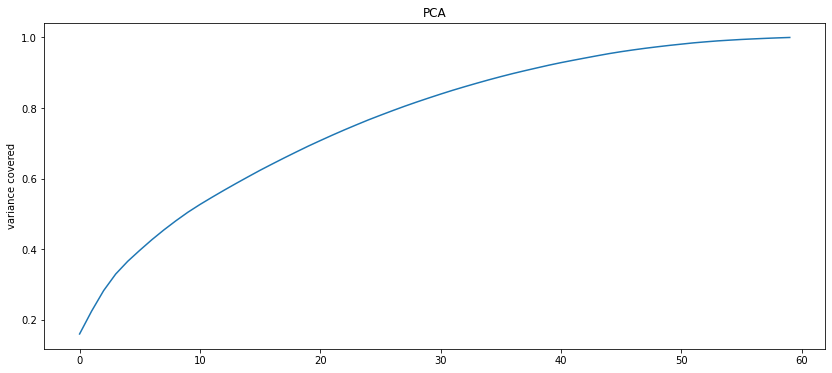

In [317]:
                               #  USING PCA          USE AFTER STANDARDSCALING
from sklearn.decomposition import PCA
pca= PCA()
pca.fit_transform(scaled)

#  let's plot scree plot to check the how many feature are covered more 
                                            #            variance (that call best component)
plt.figure(figsize=(14,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()


In [ ]:
#  Finally after Data-Preprocessing , 60 Attributes were left on which the model was to be fitted, 
# After this , PCA was used on the scaled data, then 55 PCA_componenets covered the 90 percent of variance of data 
# But we don't use PCA 

In [288]:
# 1.1       MAKE FUNCTION FOR BEST RANDOM_STATE,     IN TRAINING PROCESS           # finding best random_state

def max_score(model,scaled,y):
    maxf= 0
    rs= 0
    for r_state in range(50,150):
        x_train,x_test,y_train,y_test=train_test_split(scaled, y ,random_state = r_state,test_size=0.30,)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        tmp=r2_score(y_test,y_pred)
        
        if tmp>maxf:
            maxf=tmp
            rs=r_state
            print("maximum r2_score is at random state :",rs," and it is :",maxf)


In [289]:
## 
kfold= KFold(n_splits=8, shuffle=True, random_state=59)

def model_score(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    pred= model.predict(x_train)
    y_pred= model.predict(x_test)
    print('training_score =', r2_score(y_train,pred))
        
    print('test_r2_score=', r2_score(y_test,y_pred))
    print('mean_squared_error =', mean_squared_error(y_test,y_pred))
    print('mean_absolute_error= ', mean_absolute_error(y_test, y_pred))
    print('root_mean_squared_error =', np.sqrt(mean_squared_error(y_test,y_pred)))


def cross_val(model,x_train,y_train,algo):
        
    cv_score= cross_val_score(model,x_train,y_train,cv= kfold,)
    print('cross_val_score with', algo,'=', cv_score.mean())
    

In [348]:

   #                    TRAIN & TEST  THE  MODEL  WITH     lINEAR-REGRESSION                                       
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
max_score(lr, scaled, y)


maximum r2_score is at random state : 50  and it is : 0.8273568738355969
maximum r2_score is at random state : 58  and it is : 0.8549722741632096
maximum r2_score is at random state : 113  and it is : 0.8551689034523839
maximum r2_score is at random state : 142  and it is : 0.8584352199389037
maximum r2_score is at random state : 147  and it is : 0.867367423389422


In [349]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y ,random_state = 147,test_size=0.30,)
lr.fit(x_train, y_train) 
lr_pred= lr.predict(x_test)
print('test_r2_score=', r2_score(y_test,lr_pred))
print('mean_squared_error =', mean_squared_error(y_test,lr_pred))
print('mean_absolute_error= ', mean_absolute_error(y_test, lr_pred))
print('root_mean_squared_error =', np.sqrt(mean_squared_error(y_test,lr_pred)))

test_r2_score= 0.867367423389422
mean_squared_error = 716471618.1550112
mean_absolute_error=  20233.02194841514
root_mean_squared_error = 26766.98746880215


In [295]:

   ##                    TRAIN & TEST  THE  MODEL  WITH     RANDOMFOREST-REGRESSOR   
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
max_score(rf ,scaled, y)

maximum r2_score is at random state : 50  and it is : 0.8535526277120289
maximum r2_score is at random state : 53  and it is : 0.8897680690320203
maximum r2_score is at random state : 58  and it is : 0.9146089390550683


In [341]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y ,random_state = 58,test_size=0.30,)
rf.fit(x_train, y_train) 
rf_pred= rf.predict(x_test)                                 ## RANDOMFOREST-REGRESSOR 
print('test_r2_score=', r2_score(y_test,rf_pred))
print('mean_squared_error =', mean_squared_error(y_test,rf_pred))
print('mean_absolute_error= ', mean_absolute_error(y_test, rf_pred))
print('root_mean_squared_error =', np.sqrt(mean_squared_error(y_test,rf_pred)))

test_r2_score= 0.9106336096459342
mean_squared_error = 409274990.5605432
mean_absolute_error=  14892.540267558528
root_mean_squared_error = 20230.545977816397


In [296]:


##                          TRAIN & TEST  THE  MODEL  WITH     ADABOOST-REGRESSOR  
from sklearn.ensemble import AdaBoostRegressor
ad= AdaBoostRegressor()
max_score(ad , scaled, y)

maximum r2_score is at random state : 50  and it is : 0.7260152636196278
maximum r2_score is at random state : 51  and it is : 0.7498859986283644
maximum r2_score is at random state : 53  and it is : 0.806644799218456
maximum r2_score is at random state : 58  and it is : 0.83213453609208
maximum r2_score is at random state : 59  and it is : 0.8462647705924632
maximum r2_score is at random state : 100  and it is : 0.8507273765860982


In [342]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y ,random_state = 100,test_size=0.30,)
ad.fit(x_train, y_train) 
ad_pred= lr.predict(x_test)                                            ##   ADABOOST-REGRESSOR
print('test_r2_score=', r2_score(y_test,ad_pred))
print('mean_squared_error =', mean_squared_error(y_test,ad_pred))
print('mean_absolute_error= ', mean_absolute_error(y_test, ad_pred))
print('root_mean_squared_error =', np.sqrt(mean_squared_error(y_test,ad_pred)))

test_r2_score= 0.8665526432589832
mean_squared_error = 816647845.225433
mean_absolute_error=  18449.36302200764
root_mean_squared_error = 28577.051023949847


In [344]:

###                          lETS TRAIN THE MODEL USING WITH  XGBOOST-REGRESSOR
import xgboost
xgb = xgboost.XGBRegressor()
max_score(xgb , scaled, y)

maximum r2_score is at random state : 50  and it is : 0.8518660562175007
maximum r2_score is at random state : 53  and it is : 0.8531433502519846
maximum r2_score is at random state : 55  and it is : 0.8710164921909999
maximum r2_score is at random state : 58  and it is : 0.9034380046362024


In [345]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y ,random_state = 58 ,test_size=0.30,)
xgb.fit(x_train, y_train) 
xgb_pred= lr.predict(x_test)
print('test_r2_score=', r2_score(y_test,xgb_pred))
print('mean_squared_error =', mean_squared_error(y_test,xgb_pred))
print('mean_absolute_error= ', mean_absolute_error(y_test, xgb_pred))
print('root_mean_squared_error =', np.sqrt(mean_squared_error(y_test,xgb_pred)))

test_r2_score= 0.8758512656189351
mean_squared_error = 568569144.2901837
mean_absolute_error=  17467.26369610972
root_mean_squared_error = 23844.687967976926


In [305]:

x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 147, test_size=0.30,)
cross_val(lr,x_train,y_train, 'lOGISTIC-REGRESSION')                      ##  cross-validation-score   lINEAR-REGRESSION
print('*'*20)


x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 58,test_size=0.30,)
cross_val(ad ,x_train,y_train,'AdaBoost-Regressor')                    ##   cross-validation   ADABOOST-REGRESSOR
print('*'*20)


x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 100,test_size=0.30,)
cross_val(rf,x_train,y_train, 'RandomForest_Regressor')                     ##  cross-validation    RANDOMFOREST-REGRESSOR



cross_val_score with lOGISTIC-REGRESSION = 0.7998977904962783
********************
cross_val_score with AdaBoost-Regressor = 0.7731734162360249
********************
cross_val_score with RandomForest_Regressor = 0.8294252241905669


In [ ]:
HYPERPARAMETER TUNNING WITH GRIDSEARCH_CV

In [329]:
#  HYPERPARAMATER TUNING   with                '''' RANDOMFOREST-REGRESSOR''''

x_train, x_test,y_train,y_test= train_test_split(scaled, y, test_size=0.30, random_state= 58)
param= {'n_estimators':[180, 280],'max_depth':[7,11,14] ,'min_samples_split':[2,3],'min_samples_leaf':[1,2],
        'max_features':[0.7,0.8,0.6,1.0] }
grid = GridSearchCV(rf ,param, cv=kfold,scoring='r2', n_jobs=-1)
grid.fit(x_train,y_train)
print('best_parameter=', grid.best_params_ ,'\n')

best_parameter= {'max_depth': 11, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 280} 



In [333]:
G_RF = RandomForestRegressor(max_depth=14,n_estimators=280,oob_score=True,min_samples_split=3,max_features=0.6 )
G_RF.fit(x_train, y_train)
pred2 = G_RF.predict(x_test)
print('r2_score=', r2_score(y_test, pred2))
print('mean_square_error = ', mean_squared_error(y_test, pred2), '\n') 
print('mean_absolute_error = ', mean_absolute_error(y_test, pred2), '\n')
print('root_mean_square_error =', np.sqrt(mean_squared_error(y_test, pred2)))

r2_score= 0.9171349550145905
mean_square_error =  379500507.6274684 

mean_absolute_error =  14146.020306948298 

root_mean_square_error = 19480.772767718132


In [357]:
pd.DataFrame({'linear-Regression':lr_pred,'XGB-Regressor':xgb_pred,'RandomForest':pred2 ,'y_test':y_test})

linear-Regression  XGB-Regressor   RandomForest    y_test
486       197557.091961  171150.607385  198950.301068  170000.0
173        99650.730834  296724.974814  287130.718801  125000.0
453       234617.634270  192185.129868  183561.783665  240000.0
538        87991.162681  106914.294822  125692.403182  121600.0
968       148466.857539   73501.518706  100970.253769  170000.0
164       120386.085385  140761.579802  125741.359220  134800.0
104       343056.120548  160335.749757  153066.497764  335000.0
829       202743.469084  131776.111838  146503.152585  187100.0
85        103186.625856   79895.614610  100838.471320  102000.0
738       152017.078904  359225.741158  390306.710649  140000.0
130       245567.159997  312130.467521  352705.449588  232000.0
1150      300714.306305  119205.364219  136489.257962  372500.0
809       116639.983348  186294.202050  174928.604718  115000.0
535       182267.318830  151667.967370  145427.162961  157900.0
503       161353.233484  161736.457860  175609.168401  164700.0
123       101506.869139  224276.039936  182788.831977   89500.0
631       224847.972280  106488.516173  113905.776534  200000.0
67        104345.152667  142885.079222  139019.772506  130000.0
934       202729.195320  176494.149120  160222.553139  187750.0
730       265214.142390   35176.841167   94503.902950  239799.0
591       193743.045633  179221.914161  172748.702280  235000.0
607       300565.596831  217812.916028  180627.327024  283463.0
49        161725.879619  155479.086925  146596.440501  155000.0
870       292392.102668   78230.787177  116617.221554  340000.0
963       101694.475280  177635.768871  144040.903709  119000.0
430       124822.987877  260359.575871  237852.538867  110000.0
16        138807.576485  225282.729155  225359.280761  120500.0
515       181500.210529  169134.085242  167914.919082  184000.0
612       114074.772007  261240.730706  233589.873548  139000.0
1028      183442.837403   74990.880845  122235.209341  177500.0
364       217876.786469  140510.246678  146749.142573  215000.0
1113      131150.687284  257858.674426  251643.711684  132000.0
849       159729.612109  297116.780319  304264.188741  171900.0
1010      146208.901866  130995.923824  136864.036464  156000.0
739       193691.366013  188258.522233  183445.285023  178900.0
209       106488.516173  153404.549166  138404.217630  135750.0
100       251593.938566  155894.655742  163017.410903  251000.0
1081      155899.160027  136383.212465  128542.145712  149900.0
848       144948.471816  159420.809900  137854.488962  144000.0
823       123571.209265  159729.612109  166489.442120  120500.0
1062      139521.273434  398724.814186  368672.434643  155000.0
451       232638.919533  217017.096064  214136.174736  213000.0
236       169088.855159  177214.254422  160987.507244  157000.0
1064      316352.604603  197628.601076  187461.033620  369900.0
975       120444.037071  104499.294400  118948.265771  114500.0
769        41173.328872  199158.342560  191261.609636   85000.0
648       190195.860374  170342.718650  159941.978313  170000.0
153       179221.914161  128977.038177  134527.317897  174000.0
1096      211359.157181  113008.521515  130372.840415  189000.0
336       237268.930395  225144.226416  217355.535844  226000.0
845       137327.076516  116795.560661  131184.907701  110000.0
366       193476.255627  390321.747013  453548.096722  176000.0
114       230656.221080  229405.357566  204011.219722  259500.0
947       161990.818698  193691.366013  175781.772798  145500.0
396        25644.359272  193524.285804  189084.293879   37900.0
526       192056.980088  183442.837403  185812.999900  159895.0
780       189994.641236  202743.469084  208949.792146  183000.0
998       245150.936842  288868.271805  261446.492832  249700.0
116       166062.308288  218606.166355  197294.640537  141000.0
523       312130.467521  240807.116043  238208.894760  350000.0
773       159004.085228   66747.311071  101349.683680  151000.0
323       102654.664238   32501.836263

In [355]:


#  PREDICT  ON TEST DATA

x1 = df_new.iloc[994:].drop('SalePrice', axis=1)
x1.shape

(252, 60)

In [356]:
#  SCALING THE TEST DATA BEFORE PREDICTION

scaled1 = sc.fit_transform(x1)
scaled1 = pd.DataFrame(scaled, columns=x1.columns)

In [358]:
pd.DataFrame({'test-data':lr.predict(scaled)})

test-data
0    120513.396453
1    255078.820553
2    227525.474424
3    258719.387696
4    234141.368215
5    171900.864609
6    146045.893348
7    153677.956010
8    127960.565221
9    140761.579802
10   236483.569857
11   222798.006447
12   128218.818661
13   159176.012066
14   138807.576485
15   229491.063150
16   168021.595872
17    82973.283770
18   126514.517976
19   142091.933750
20   125068.940722
21   183077.219707
22   230440.028082
23   137970.633487
24   348470.181154
25   106836.987135
26   170257.086670
27   296829.053260
28   155619.198930
29   234554.442898
30   140605.484309
31   138546.463190
32   172697.923543
33   212982.271413
34    83023.922128
35   213552.471643
36   119879.764794
37   125973.246034
38   140735.631662
39   165117.055860
40   114403.471518
41   179969.056977
42   142440.083808
43   161725.879619
44   293281.048622
45    -9162.299888
46   152434.809731
47   242000.305614
48   238035.028184
49   248871.632217
50    84039.897530
51   285104.648579
52   114304.506933
53   142983.037293
54   120000.433679
55   343042.478078
56   109338.728975
57   104345.152667
58   244747.865068
59   134300.584095
60   174817.334813
61   250276.980885
62    78563.472807
63   160090.584639
64    59458.514886
65   290343.488254
66    98727.683043
67   386514.326056
68   241640.905827
69   214210.883388
70   110515.941509
71   173609.393878
72   157354.631291
73   103186.625856
74   183819.230097
75   181686.544661
76   134122.521670
77   173092.236508
78   142555.305701
79   169134.085242
80   138050.291634
81   219956.793423
82   251593.938566
83   228551.715584
84   343056.120548
85    93977.032844
86   228427.555374
87   102899.908115
88   190534.845744
89   184713.251484
90   230656.221080
91   144930.944688
92   166062.308288
93   176796.933179
94   171150.607385
95    69527.582370
96   135399.195786
97   101506.869139
98   180408.303533
99   177690.099985
100   88325.256181
101  124465.331443
102   88646.350915
103  245567.159997
104  239690.531367
105  143426.578750
106  189104.109257
107  337552.270489
108  109666.560879
109  219166.325511
110  269994.573720
111  290627.802543
112  251385.606525
113  167263.503404
114  148179.740482
115  290937.928205
116  202841.514488
117  130173.731699
118  200626.295051
119   95290.855976
120  242649.124033
121  301098.258148
122  179221.914161
123  232379.660818
124  116587.675368
125  113701.552304
126   52655.899731
127  139353.452419
128  221592.453308
129  348972.769246
130  120386.085385
131  143201.859985
132  190131.696876
133  234724.999084
134  121445.574051
135  176920.218784
136   99650.730834
137   96670.794205
138  132056.517595
139  154987.740762
140  120781.931416
141  196613.701763
142  167029.210756
143   44932.318253
144   83141.330020
145  131979.724664
146  225144.226416
147  208331.531258
148  177349.201286
149  150378.821139
150  116032.489545
151  274278.015497
152  354399.207439
153  224369.985263
154  247001.966758
155  132685.979444
156  136058.809108
157  191684.871552
158  227963.227886
159  221327.120348
160  130738.027198
161  176405.707132
162  128916.046677
163  215333.246691
164   95904.113656
165  199395.060066
166  206958.136468
167  106488.516173
168  161649.129248
169  272415.571221
170  182102.435159
171  135185.653283
172  157841.011060
173  270622.085335
174  193024.567586
175  237877.745836
176  176883.504158
177  133354.095789
178  115143.468392
179  327108.018405
180  179221.730019
181  199913.793102
182  124416.482786
183   69060.822141
184  112357.911695
185  124654.099474
186  121719.560130
187  390321.747013
188  238612.096073
189  150397.319394
190  119439.562102
191  169088.855159
192  113836.602065
193   81746.478010
194  119880.066689
195  207168.570380
196  401364.014128
197  120737.742909
198  282475.864870
199  177635.768871
200  225265.174398
201  135895.373020
202  220596.673676
203    6001.384588
204  249734.536742
205  204874.753042
206  112726.398136
207  257096.011905
208  190585.965193
209  135309.625256


In [367]:
import pickle

Rainfall_prediction = 'Rainfall_prediction.pickle'

pickle.dump(G_RF, open(Rainfall_prediction, 'wb'))

In [ ]:
--we did a lot of EDA/Data-Preprocessing work on this Housing-Price-Prediction Dataset

. Then we know, These all are most important important Variables for predicting the Target , such as
 (lotArea,OverallQual,OverallCond,YearBuilt,RoofStyle,Exterior1st,ExterQual,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,
 HeatingQC,GrLivArea,FullBath,KitchenQual,GarageArea,GarageCars,GarageFinish,GarageQual,OpenPorchSF,Neighborhood,..)

. we found all those Attribtes which more importance for predicting the Target and 
   after that build model on those input-columns
    
. when more and more columns of Input-Data are positive correlated with Target_Attribute('SalePrice' of housing-dataset) 
  in REGRESSION Problem then it is easier for MachineLearing model to predict Target it means Continuous value
. If none of the columns of the input-data that positive correleted with target or very less in the REGRESSION PROBLEM, 
  then there would be more difference between the predicted value & original value 
    
. Example = we do analysis the Flight-fare-price dataset and very few columns of this dataset was more positive correllated with
  target, when we build a model using with Randomforest-Regressor then accuracy_score on test-data was 90 percent but I had
   a seperate preprocessed test data and we  make model to predict on this  test-data then it came quite different from the
    original value because  input data very less correlated or  no relation with target


. In this dataset a few more than 30 percent of columns are more positive correlated to SalePrice
  and above 85% information given by these columns of the dataset to predict the Target
    
. we make HyperParameter tuning on Randomforest-Model and last predict the test data with this Model 

. Import pickle module and save the Hypertunned Model

... 